In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import scipy.special as sc
from scipy.integrate import quad
import arviz as az

In [2]:
%config InlineBackend.figure_format = 'retina'
RANDOM_SEED = 42
rng = np.random.default_rng(RANDOM_SEED)
az.style.use("arviz-darkgrid")

In [3]:
y = rng.uniform(low=0, high=360, size=20)
print(y)

[278.62417748 157.99623831 309.09525117 251.05249046  33.90384524
 351.22404659 274.01029272 282.9831499   46.12090776 162.13893764
 133.48728872 333.63539599 231.79144323 296.19418078 159.62911158
  81.80593984 199.65052333  22.9742122  297.94722192 227.39918368]


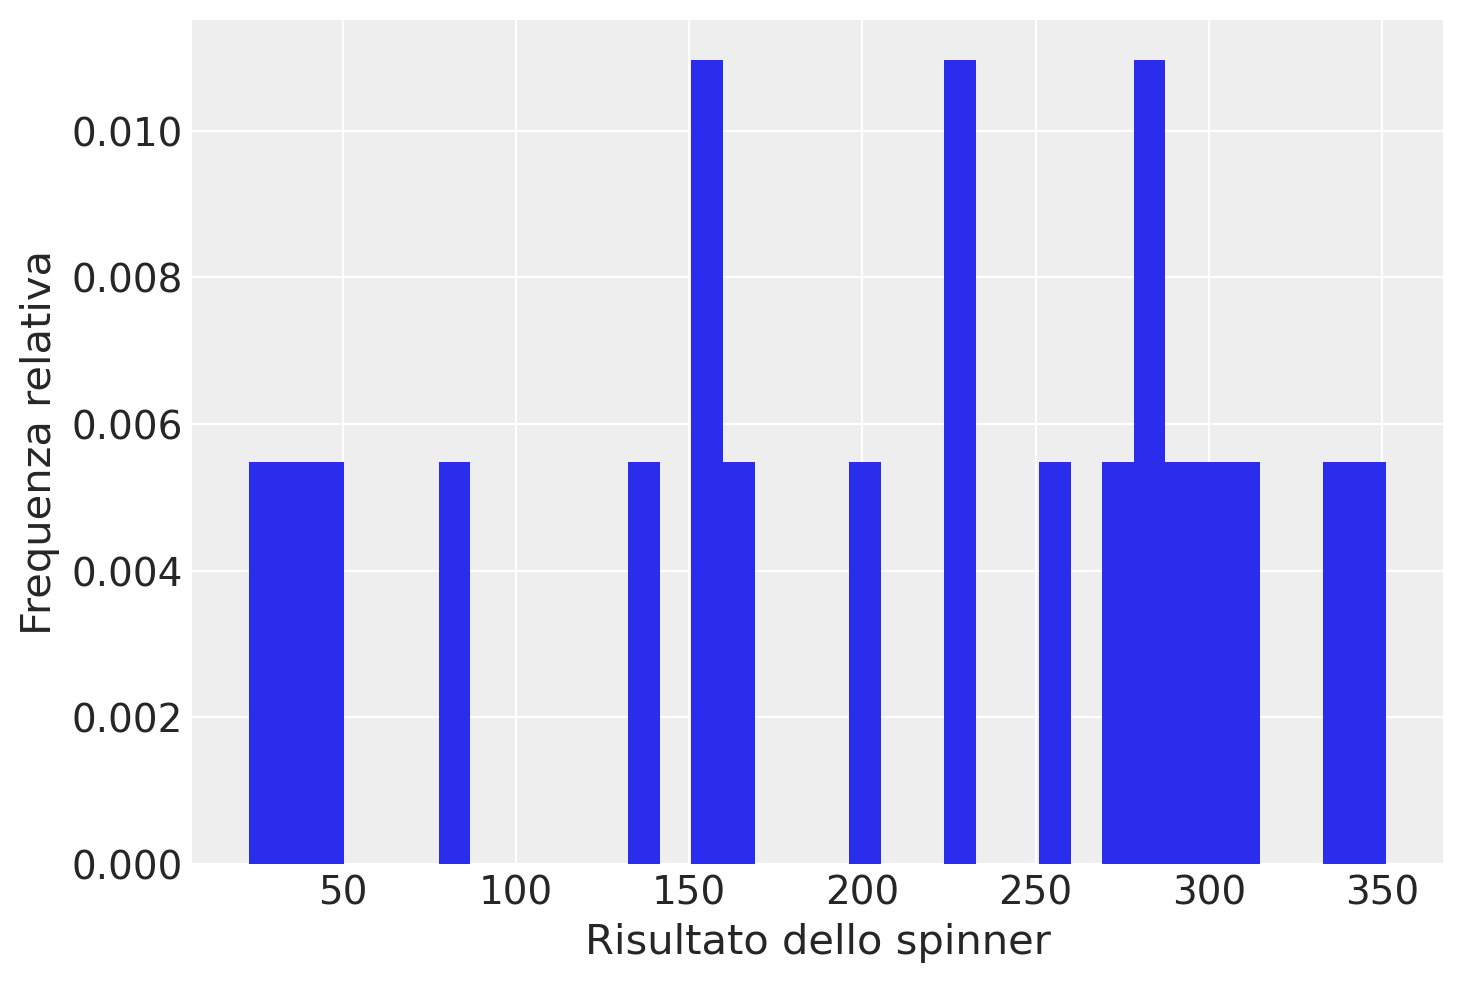

In [4]:
plt.figure()
count, bins, ignored = plt.hist(y, bins=36, density=True)
plt.xlabel("Risultato dello spinner")
plt.ylabel("Frequenza relativa");

Text(0, 0.5, 'Frequenza relativa')

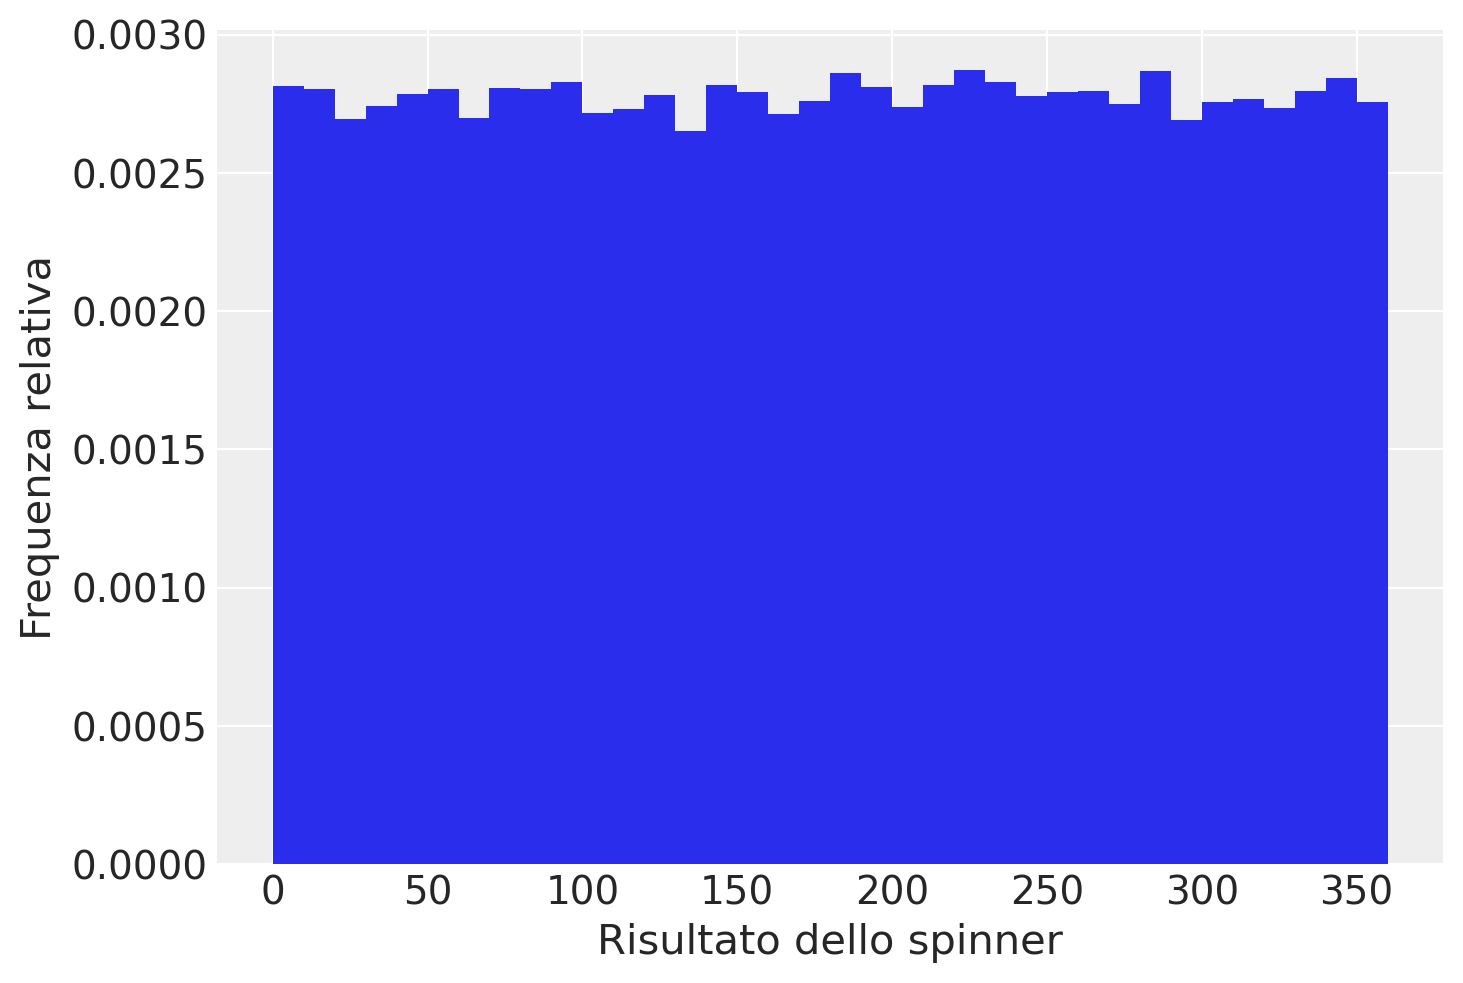

In [5]:
plt.figure()
count, bins, ignored = plt.hist(360 * rng.uniform(size=100000), bins=36, density=True)
plt.xlabel("Risultato dello spinner")
plt.ylabel("Frequenza relativa")

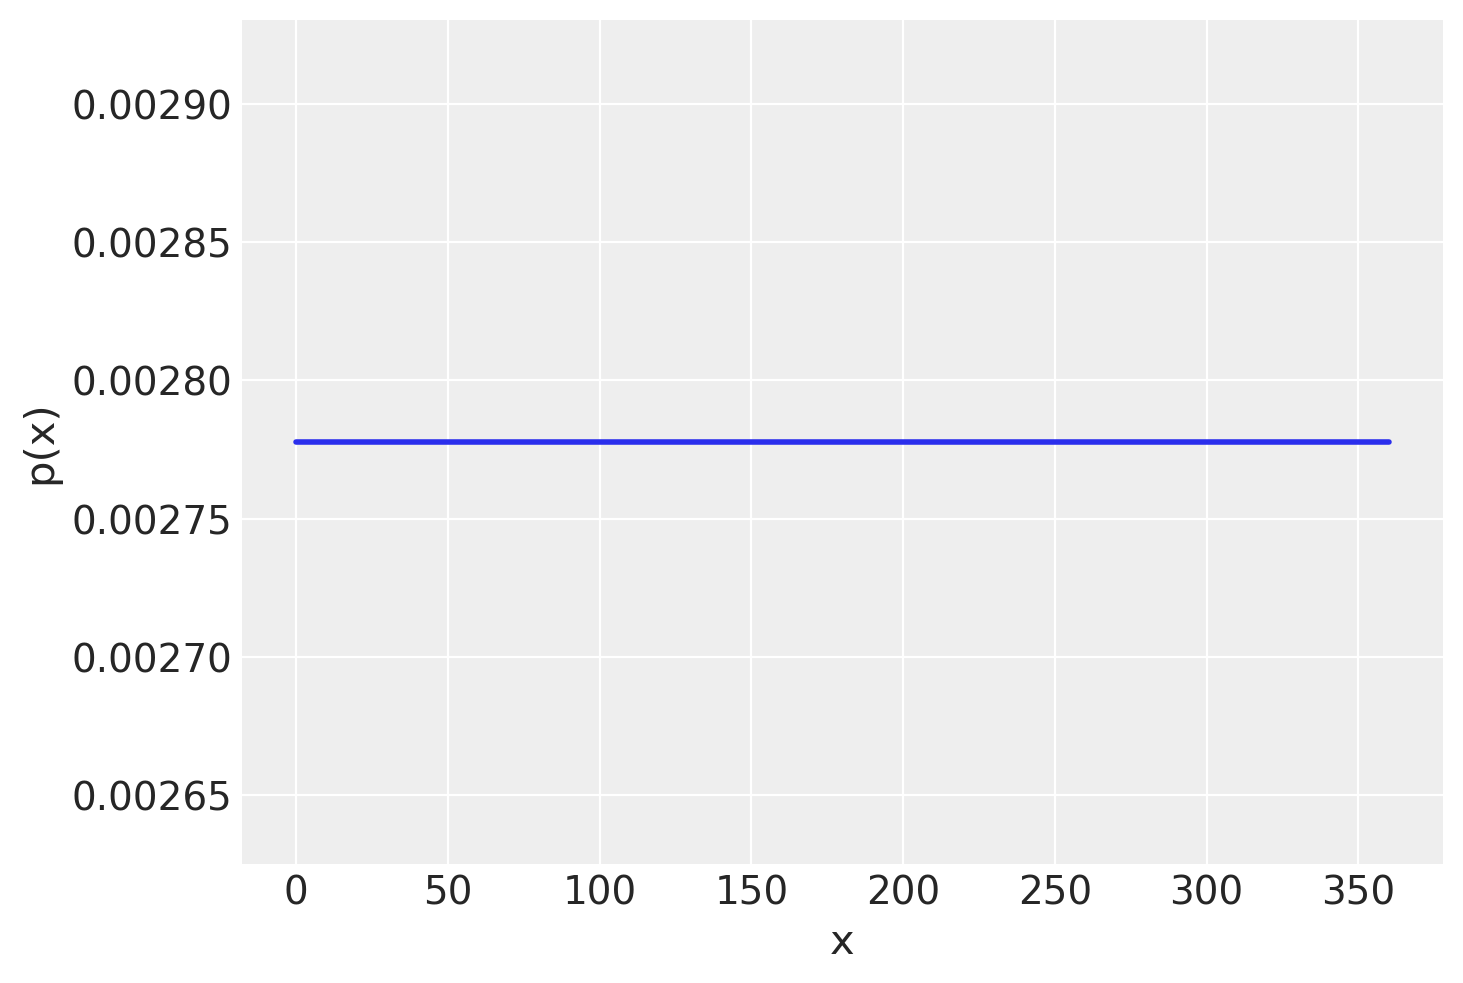

In [6]:
plt.figure()
x = np.linspace(0, 360, 100)
plt.plot(x, stats.uniform.pdf(x, 0, 360), lw=2, label="uniform pdf")
plt.xlabel("x")
plt.ylabel("p(x)");

In [7]:
100*1/360

0.2777777777777778

In [8]:
stats.uniform.cdf(250, 0, 360) - stats.uniform.cdf(150, 0, 360)

0.27777777777777773

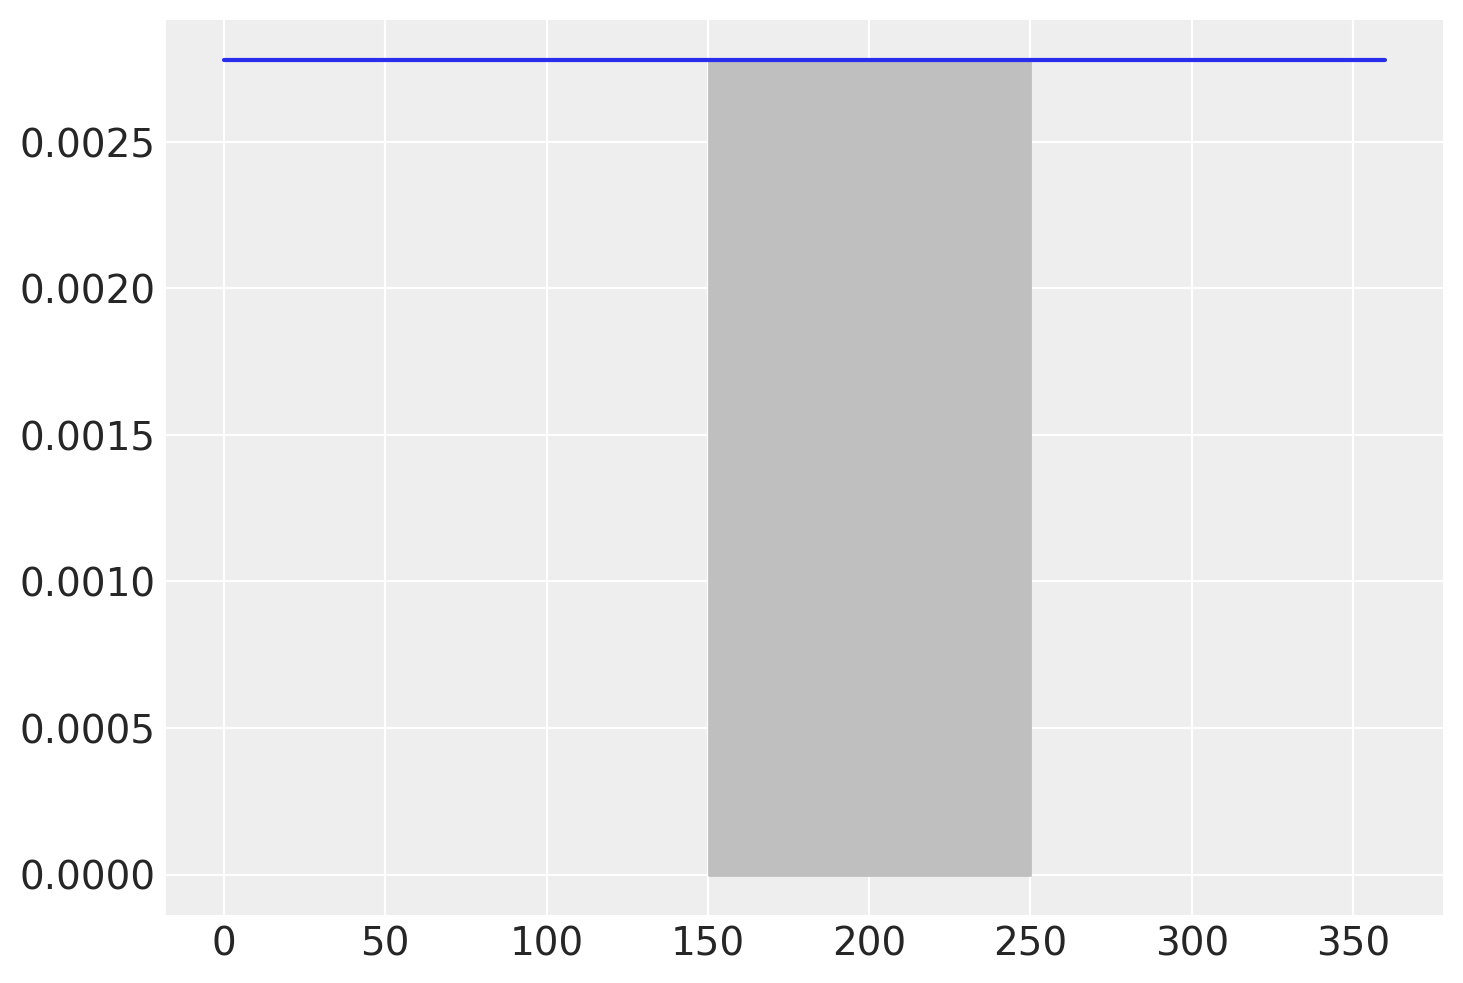

In [9]:
plt.figure()
x = np.linspace(0, 360, 1000)
fx = stats.uniform.pdf(x, 0, 360)
plt.plot(x, fx)
plt.fill_between(x, fx, where=(x >= 150) & (x <= 250), color="0.75");

In [10]:
stats.uniform.pdf([0.5, 0.8, 1.2])

array([1., 1., 0.])

In [11]:
stats.uniform.cdf([0.5, 0.8])

array([0.5, 0.8])

In [12]:
stats.uniform.cdf(0.8) - stats.uniform.cdf(0.5)

0.30000000000000004

In [13]:
stats.uniform.ppf([0.5, 0.8])

array([0.5, 0.8])

In [14]:
rng.uniform(size=5)

array([0.37949106, 0.27866256, 0.8162908 , 0.69669817, 0.10985629])

In [15]:
rng.uniform(size=100000).mean()

0.49932833719395314

In [16]:
rng.uniform(size=100000).var()


0.0832116489056256

In [17]:
1 / 12

0.08333333333333333

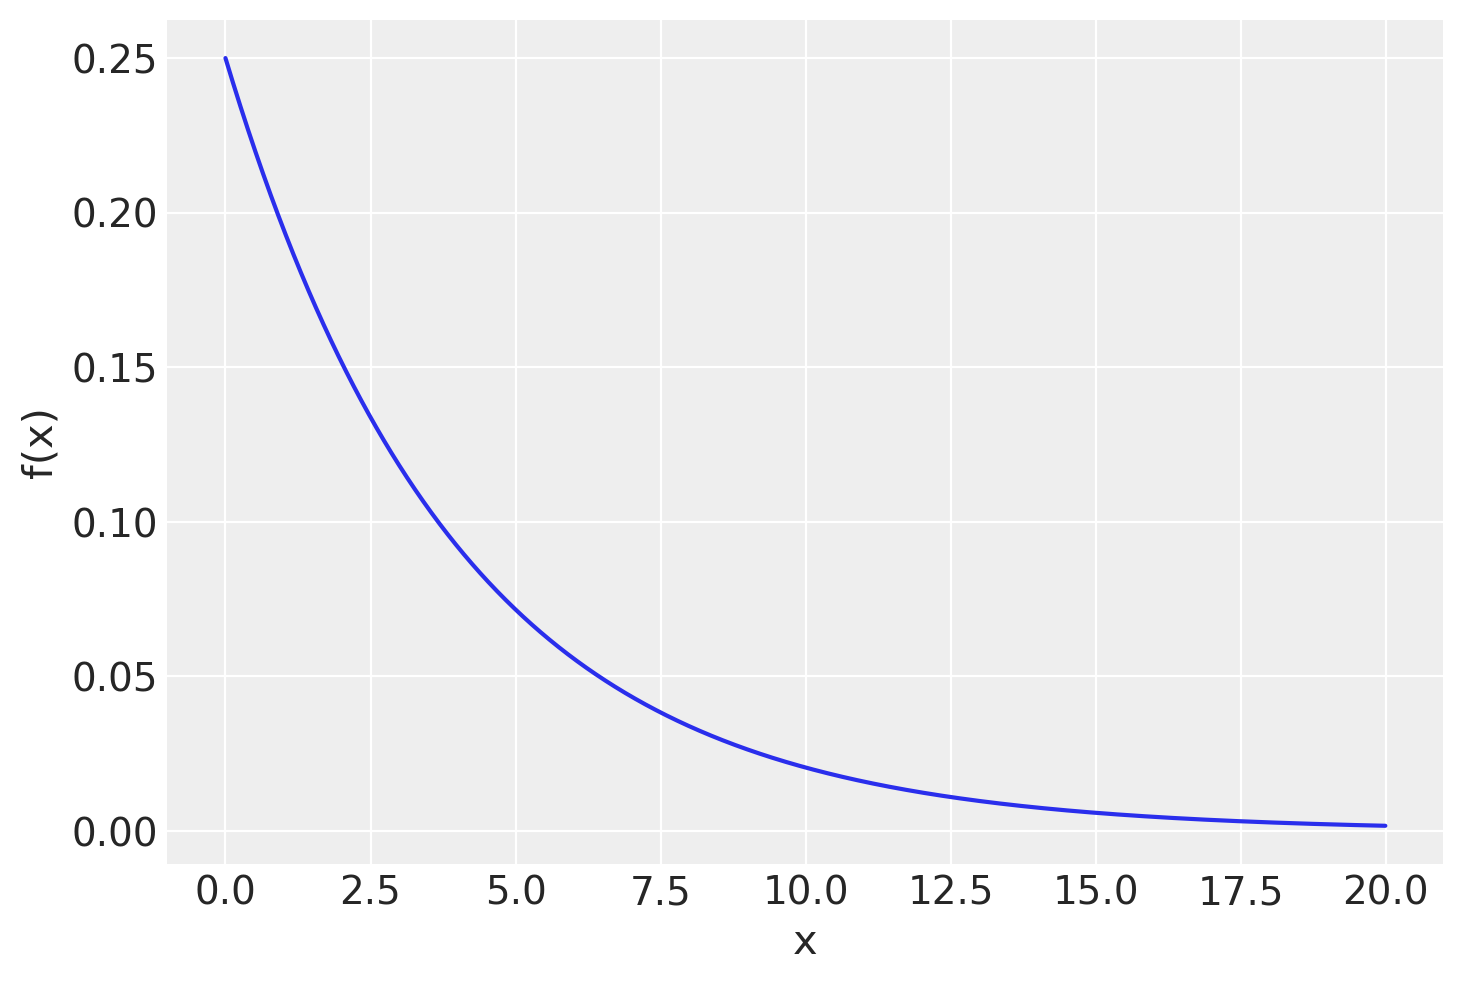

In [18]:
x = np.arange(0, 20, 0.01)
mu = 4
decay_par = 1 / mu
stdev = 1 / decay_par
pdf = stats.expon.pdf(x, loc=0, scale=stdev)

plt.figure()
plt.plot(x, pdf)
plt.xlabel("x")
plt.ylabel("f(x)");

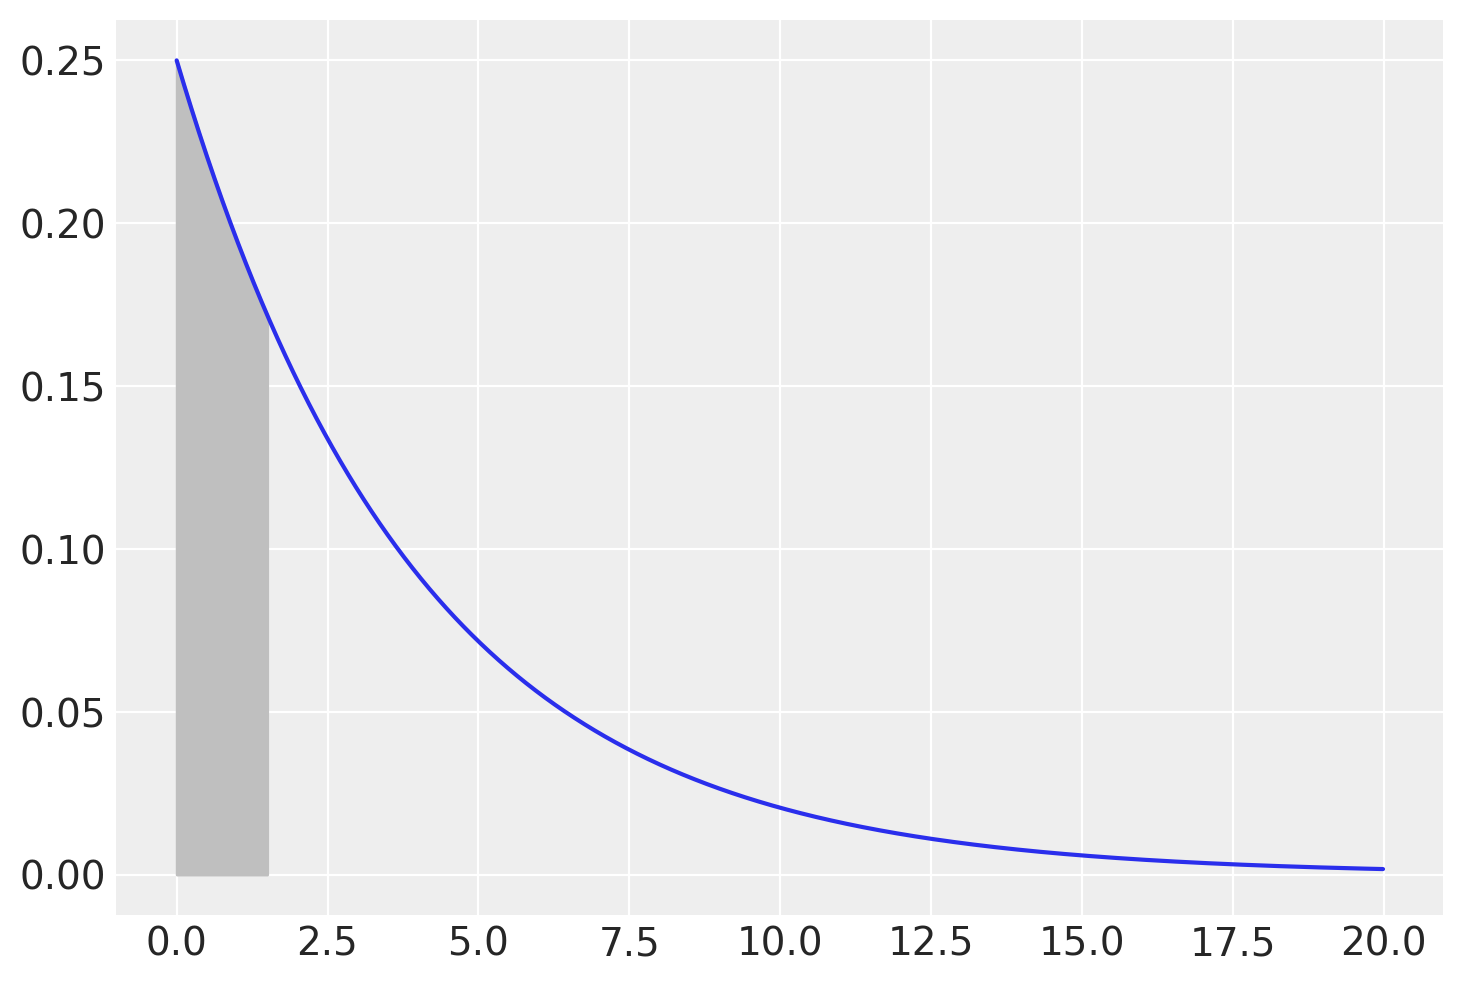

In [19]:
fx = stats.expon.pdf(x, loc=0, scale=stdev)

plt.figure()
plt.plot(x, fx)
plt.fill_between(x, fx, where=(x >= 0) & (x <= 1.5), color="0.75");

In [20]:
stats.expon.cdf(1.5, loc=0, scale=stdev) 

0.3127107212090278

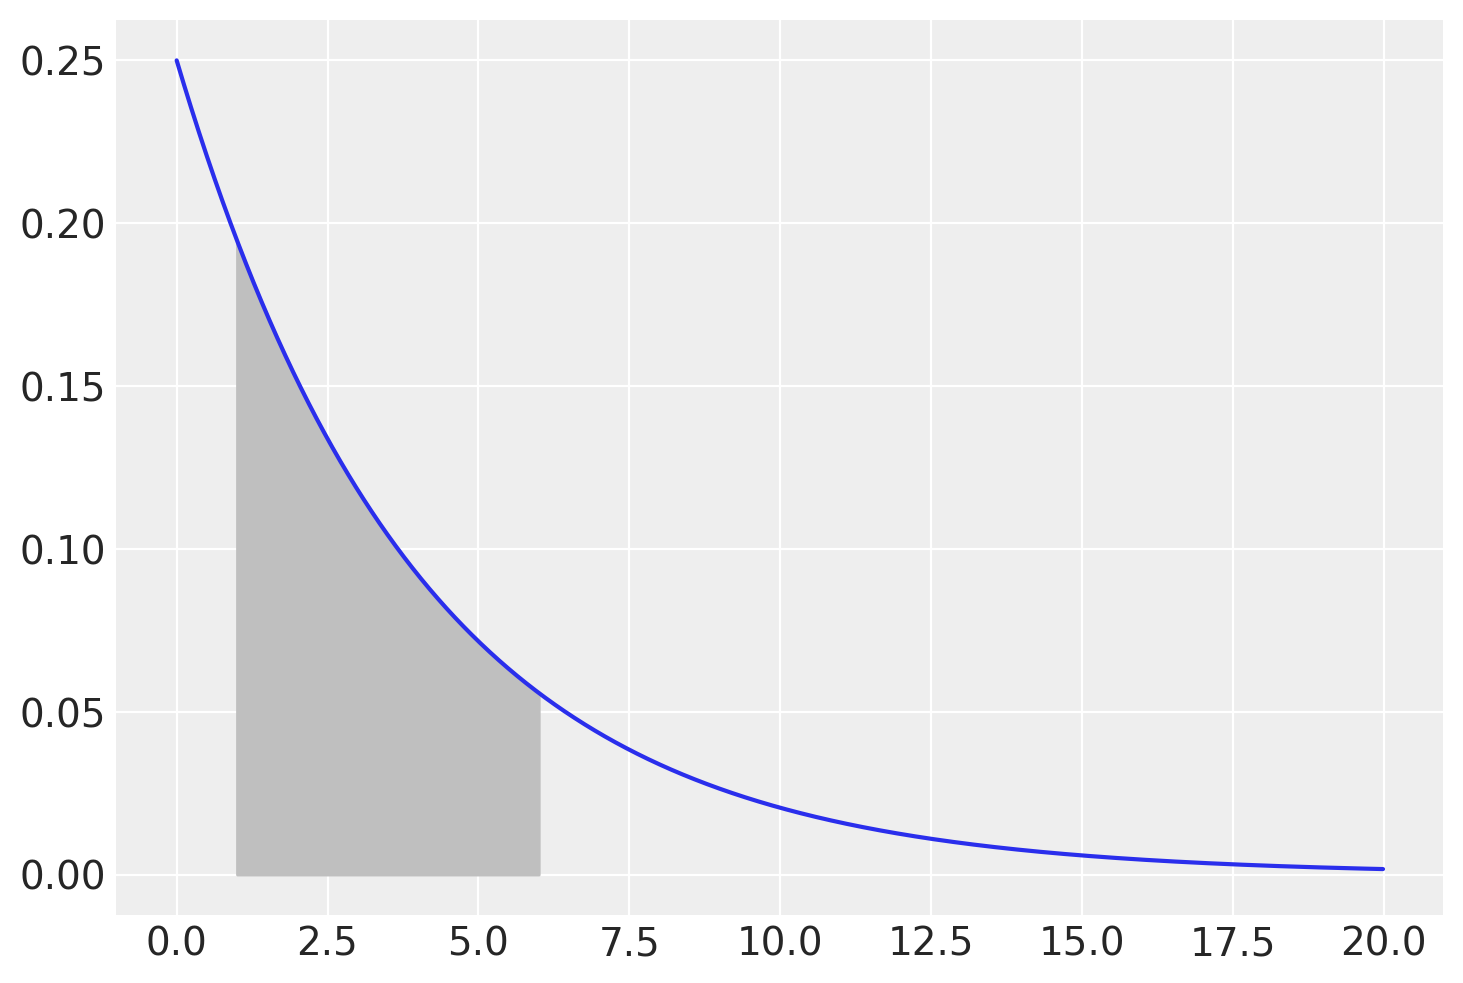

In [21]:
fx = stats.expon.pdf(x, loc=0, scale=stdev)

plt.figure()
plt.plot(x, fx)
plt.fill_between(x, fx, where=(x >= 1) & (x <= 6), color="0.75");

In [22]:
stats.expon.cdf(6, loc=0, scale=stdev) - stats.expon.cdf(1, loc=0, scale=stdev)

0.5556706229229751

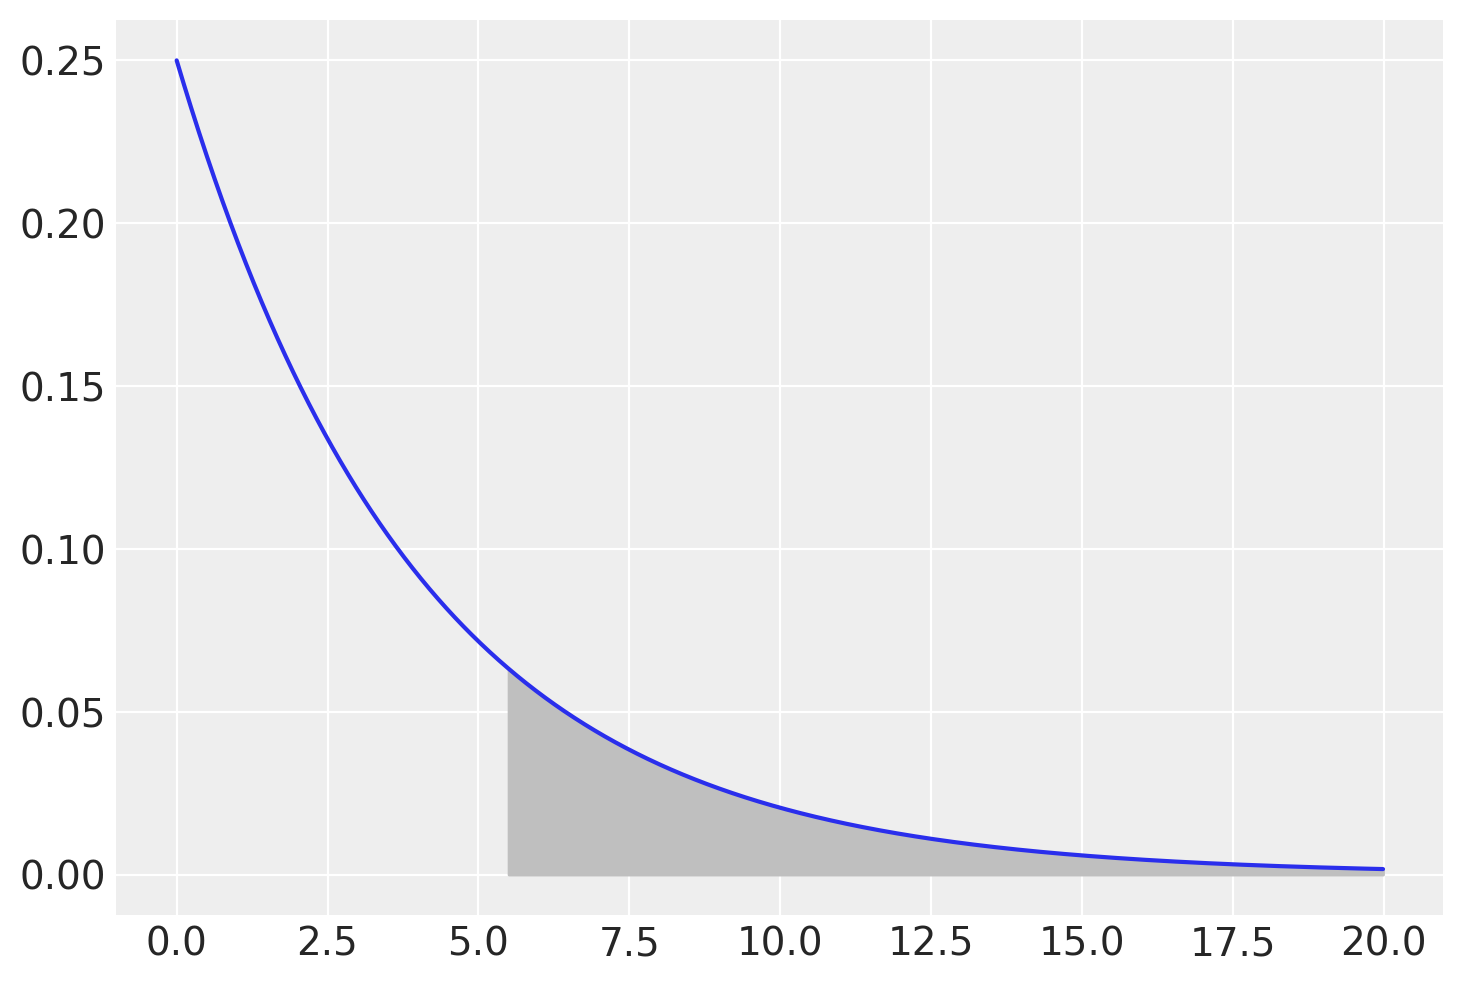

In [23]:
fx = stats.expon.pdf(x, loc=0, scale=stdev)

plt.figure()
plt.plot(x, fx)
plt.fill_between(x, fx, where=(x >= 5.5) & (x <= 21), color="0.75");

In [24]:
1 - stats.expon.cdf(5.5, loc=0, scale=stdev) 

0.25283959580474646

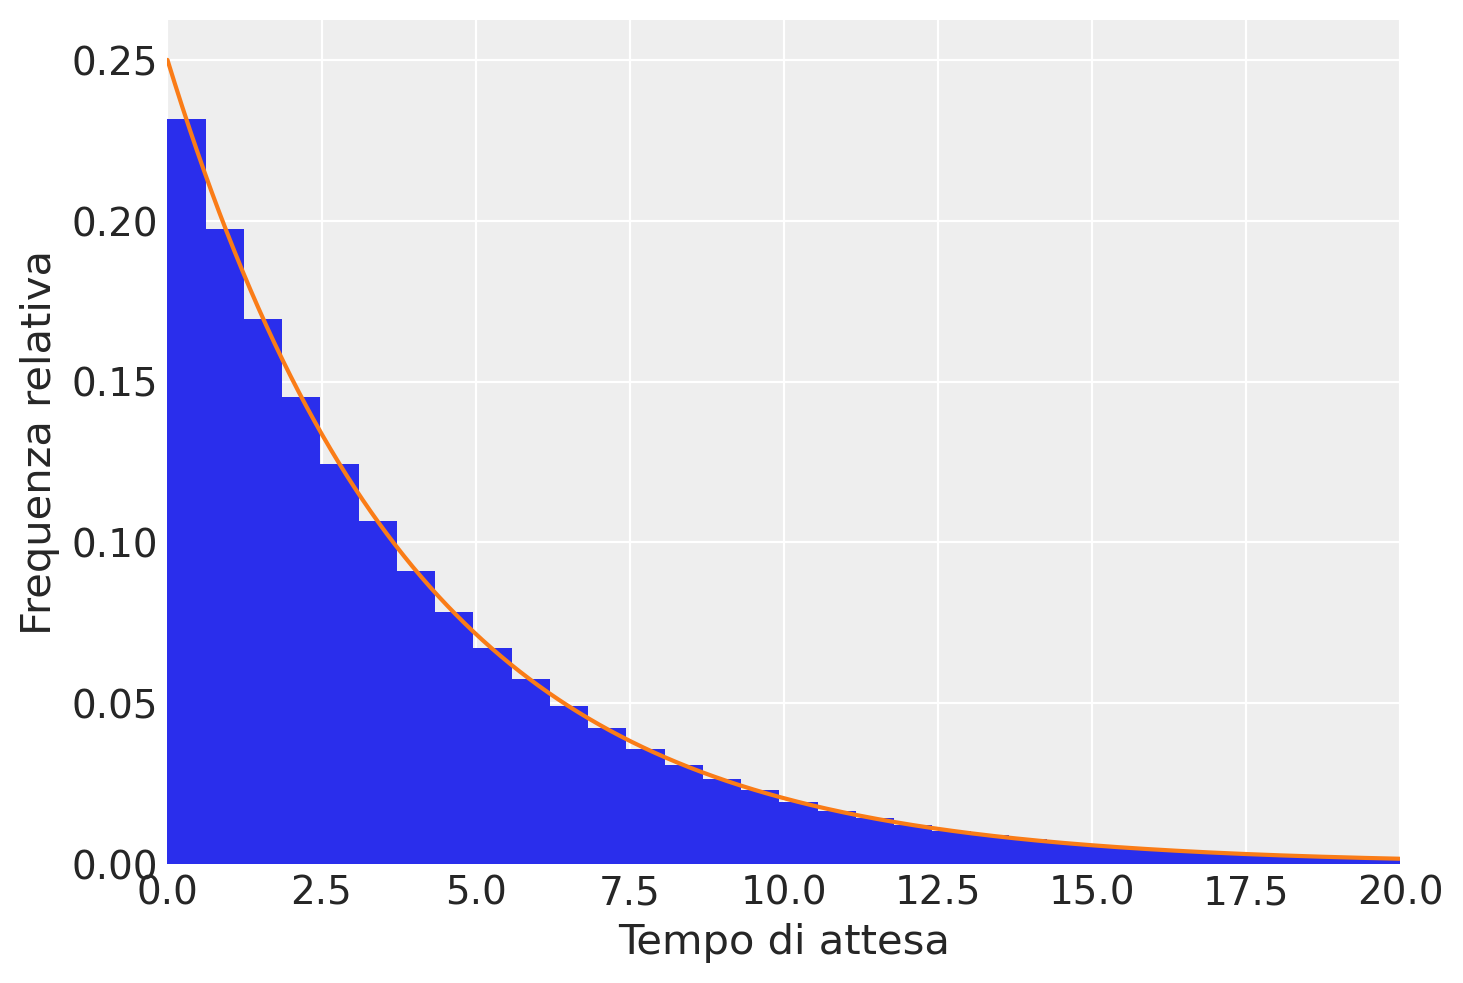

In [25]:
sexpon = stats.expon(loc=0, scale=stdev)
n = 1000000
samps = sexpon.rvs(size=n)

plt.figure()
count, bins, ignored = plt.hist(samps, bins=100, density=True)
plt.plot(x, fx)
plt.xlim([0, 20])
plt.ylabel("Frequenza relativa")
plt.xlabel("Tempo di attesa");

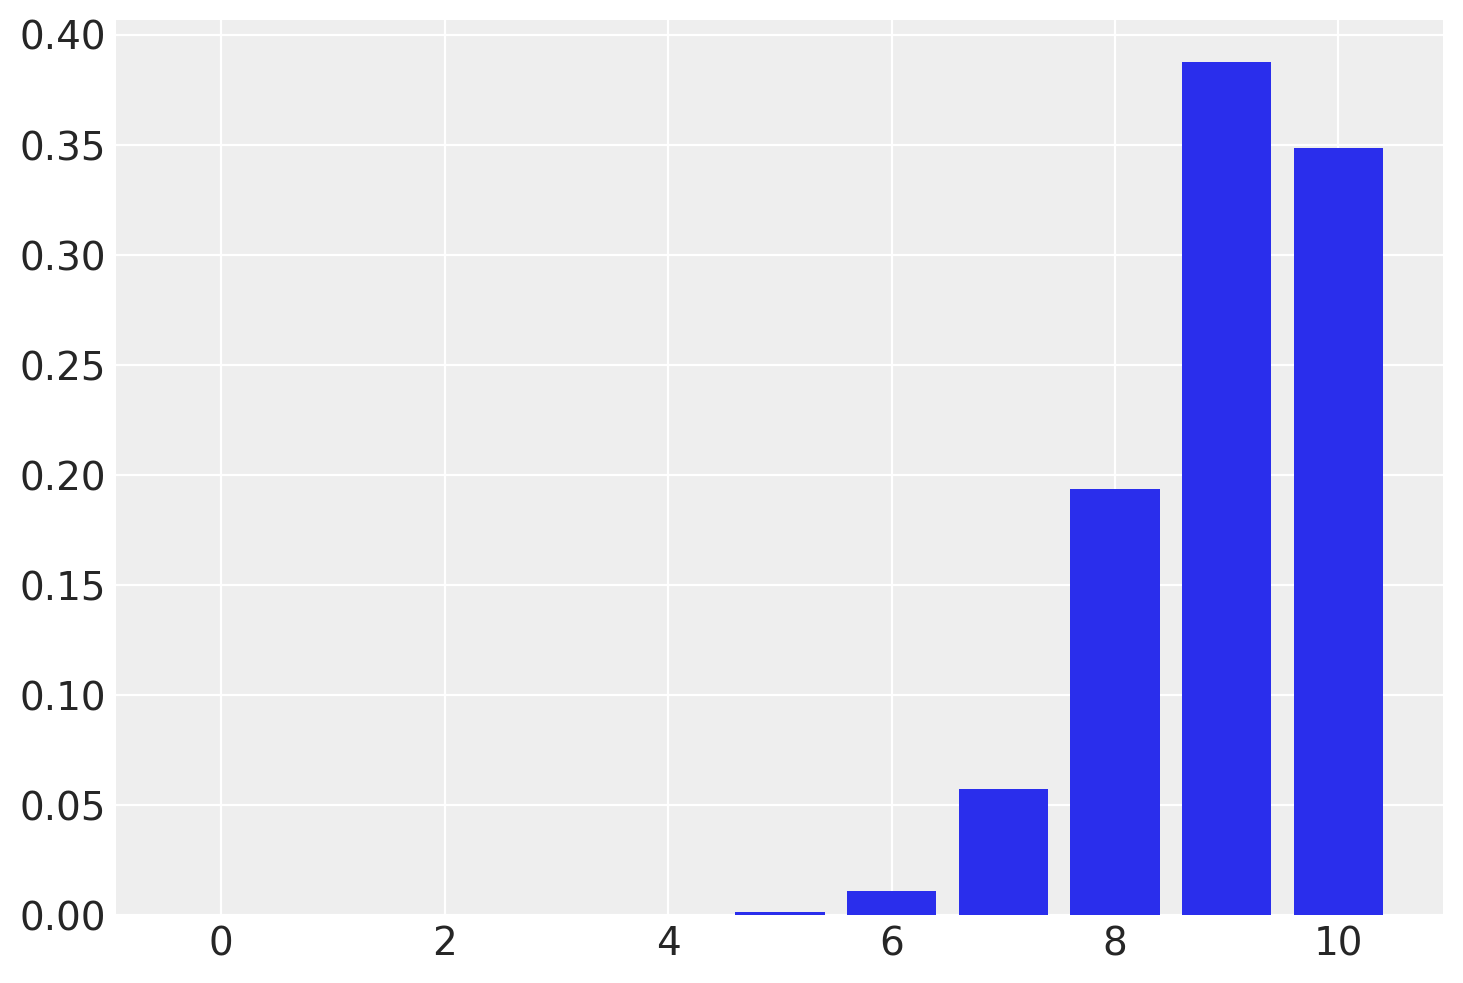

In [26]:
n = 10
p = 0.9
r_values = list(range(n + 1))
dist = [stats.binom.pmf(r, n, p) for r in r_values]

plt.figure()
plt.bar(r_values, dist);

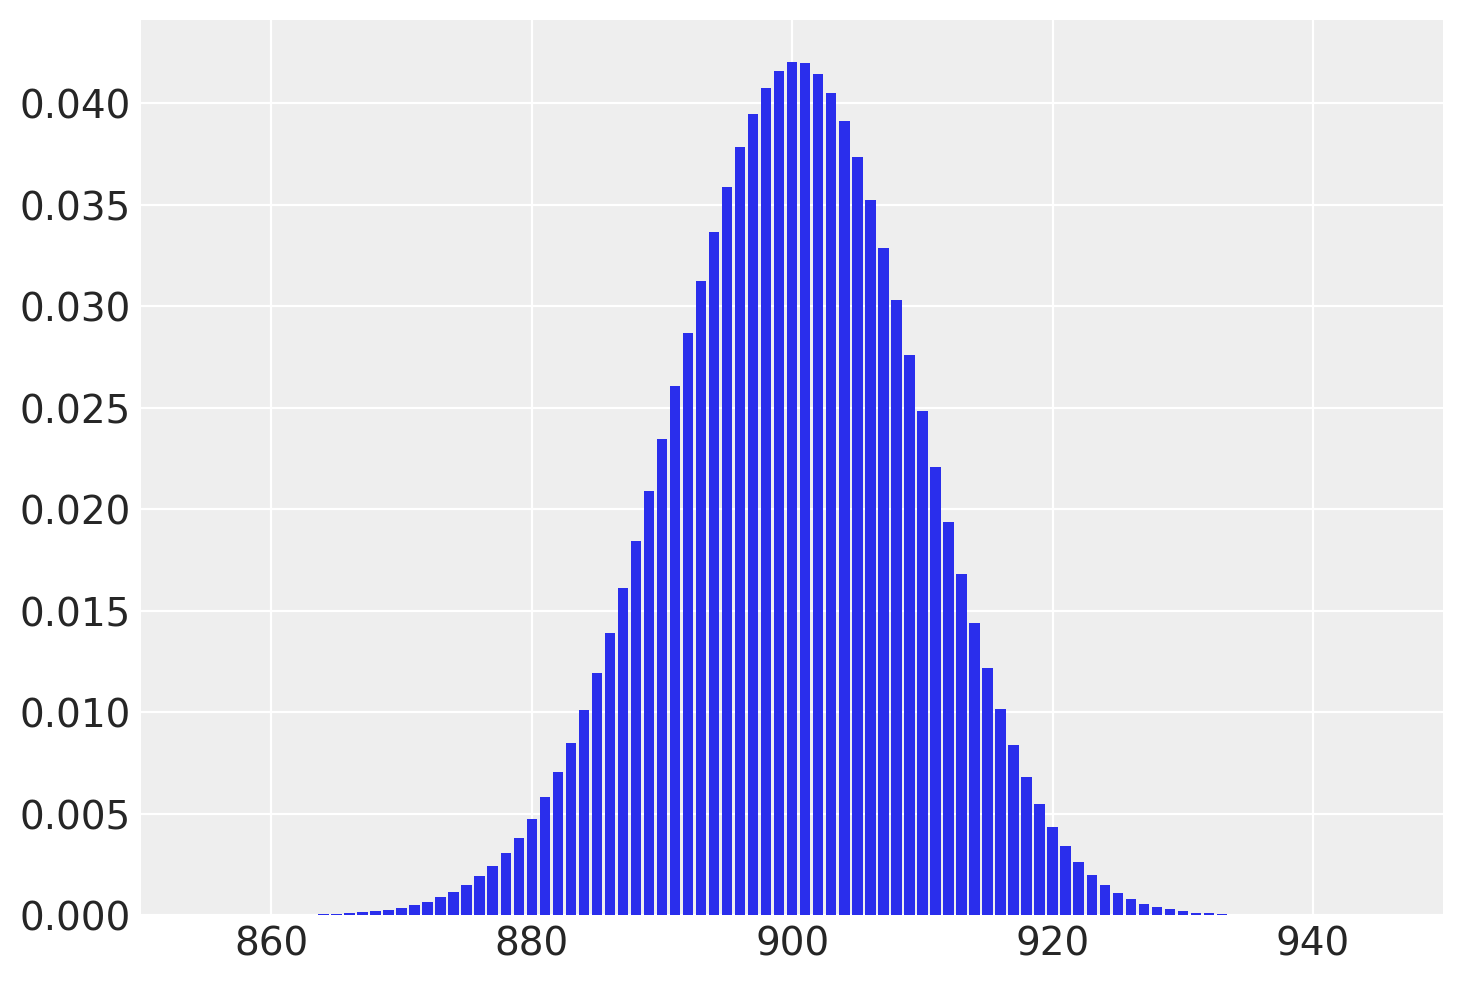

In [27]:
n = 1000
p = 0.9
r_values = list(range(n + 1))
dist = [stats.binom.pmf(r, n, p) for r in r_values]

plt.figure()
plt.bar(r_values, dist)
plt.xlim(850, 950);

In [28]:
def randomwalk(n):
    steps = []
    for i in range(n):
        rand = rng.integers(1, 3)
        if rand == 1:
            steps.append(-rng.uniform(0, 1))
        else:
            steps.append(rng.uniform(0, 1))
    walk = np.cumsum(steps)
    return walk

In [29]:
particularWalk = randomwalk(16)
print(*particularWalk)

0.37531838354697544 1.0584896463887754 1.4534636834009325 1.2937899514171627 1.5447231066244227 1.3373023369291819 1.3254604685050029 0.7344137731826899 1.136894490699304 1.9684525255384093 1.8250625862950245 1.016357414464169 1.231202594793971 2.1991617340098744 2.3950630949221305 2.4013927428252604


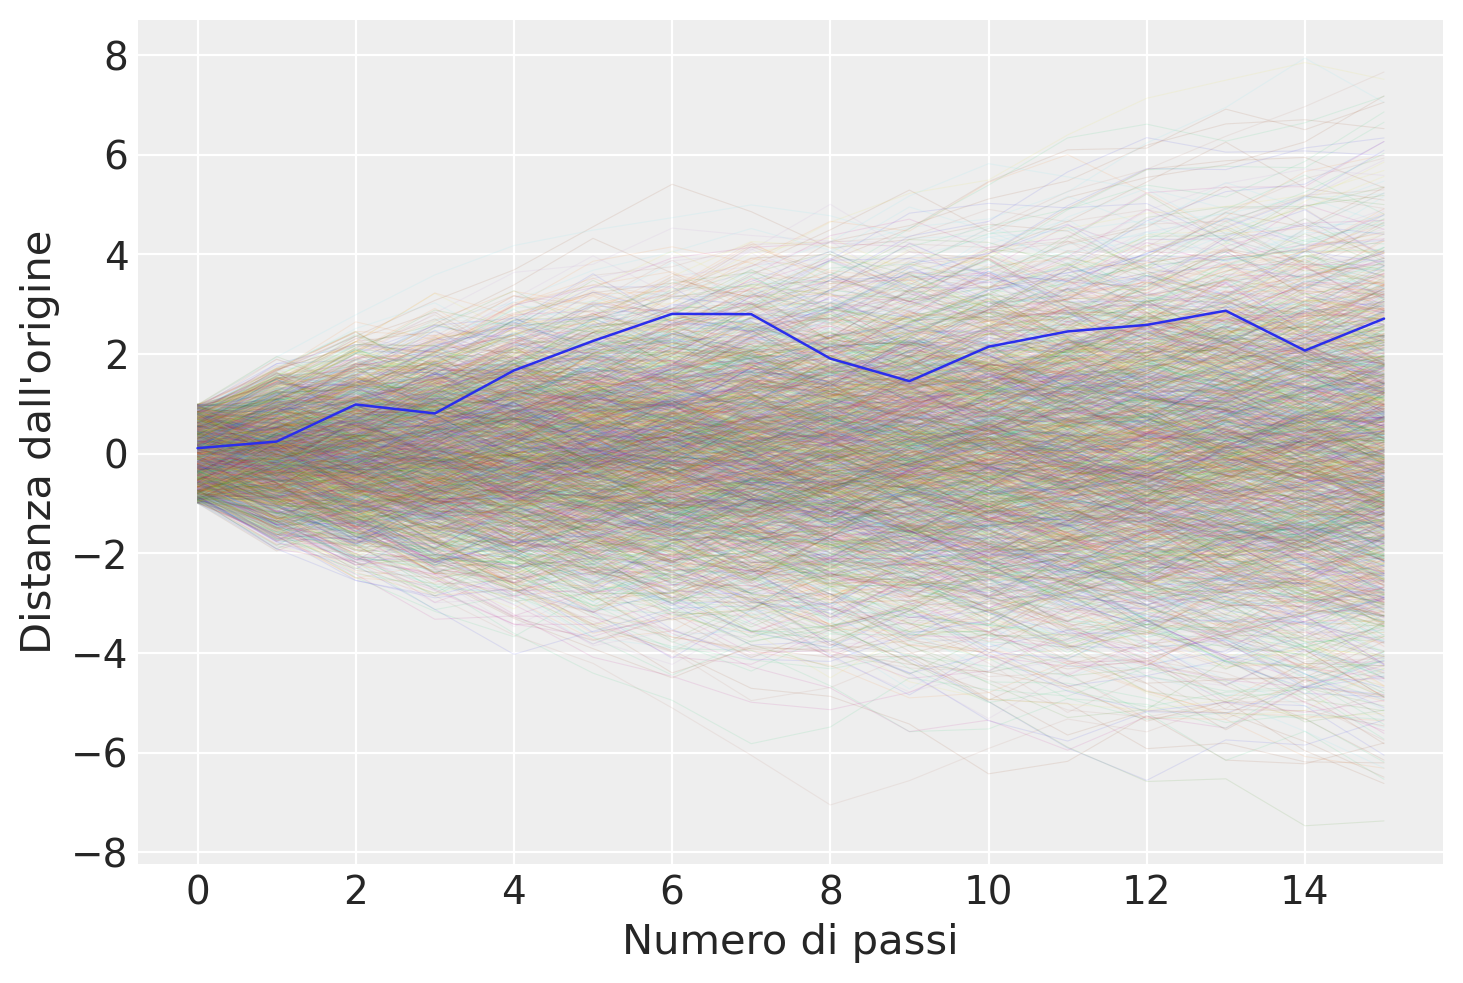

In [30]:
for k in range(2000):
    particularWalk = randomwalk(16)
    plt.plot(np.arange(16), particularWalk, linewidth=0.4, alpha=0.1)

plt.plot(np.arange(16), particularWalk, linewidth=0.9)
plt.xlabel("Numero di passi")
plt.ylabel("Distanza dall'origine");

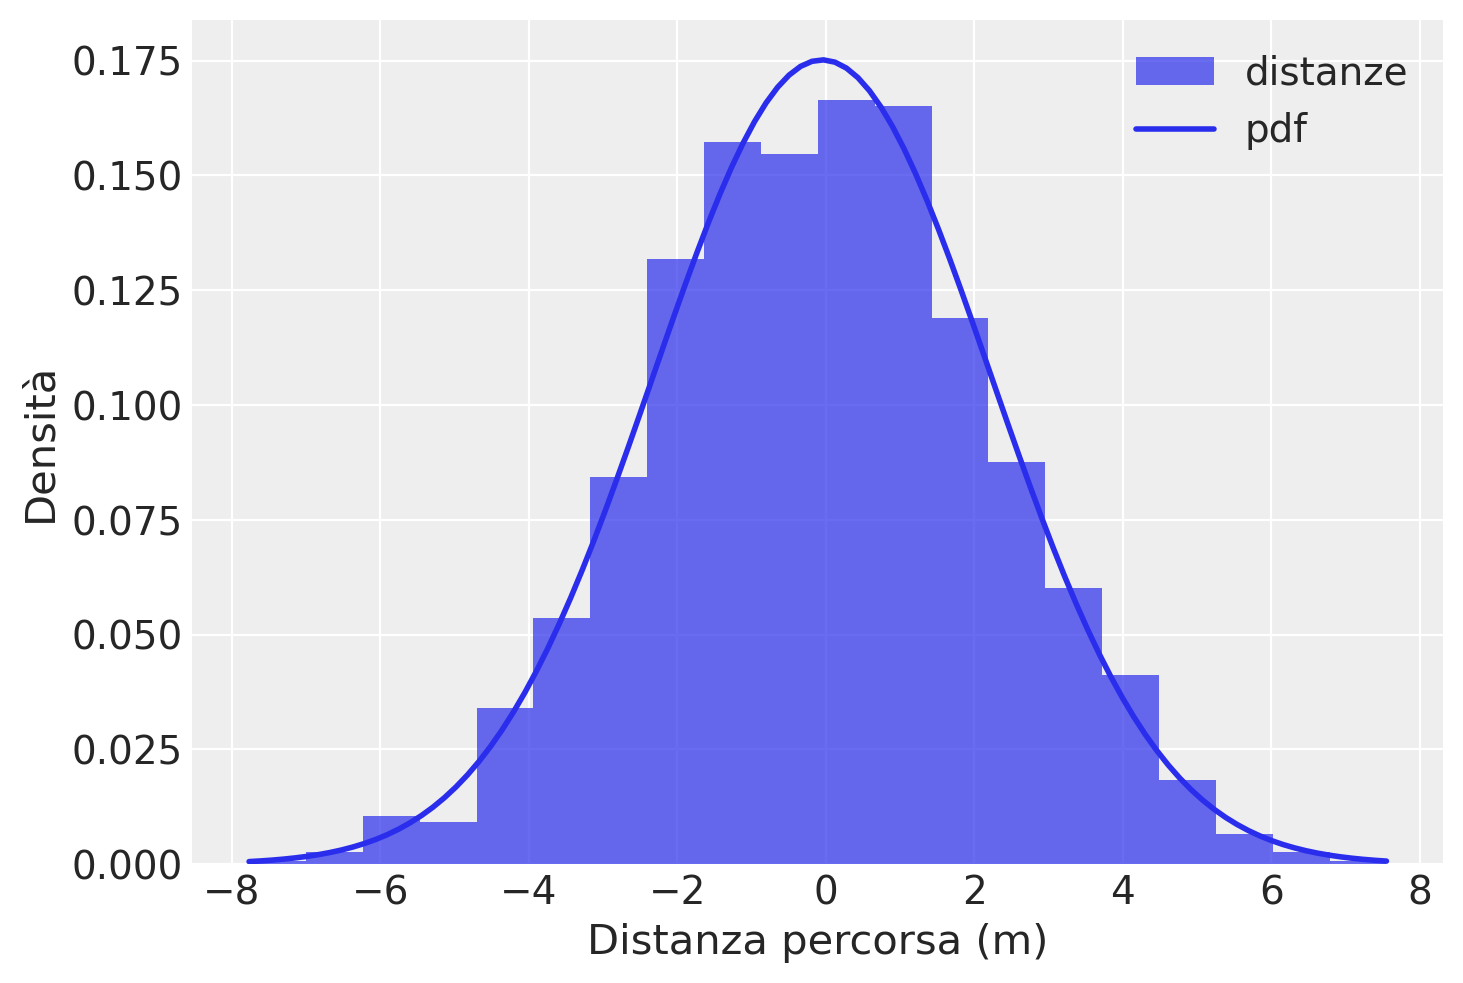

In [31]:
distances = []
for k in range(2000):
    distances.append(randomwalk(16)[15])

avg_distances = np.mean(distances)
std_distances = np.std(distances)

plt.figure()
plt.hist(
    distances, density=True, bins=20, label="distanze", alpha=0.7
)

x_pdf = np.linspace(min(distances), max(distances), 100)
y_pdf = stats.norm.pdf(x_pdf, avg_distances, std_distances)
plt.plot(x_pdf, y_pdf, "C0", lw=2, label="pdf")

plt.xlabel("Distanza percorsa (m)")
plt.ylabel("Densità")
plt.legend();

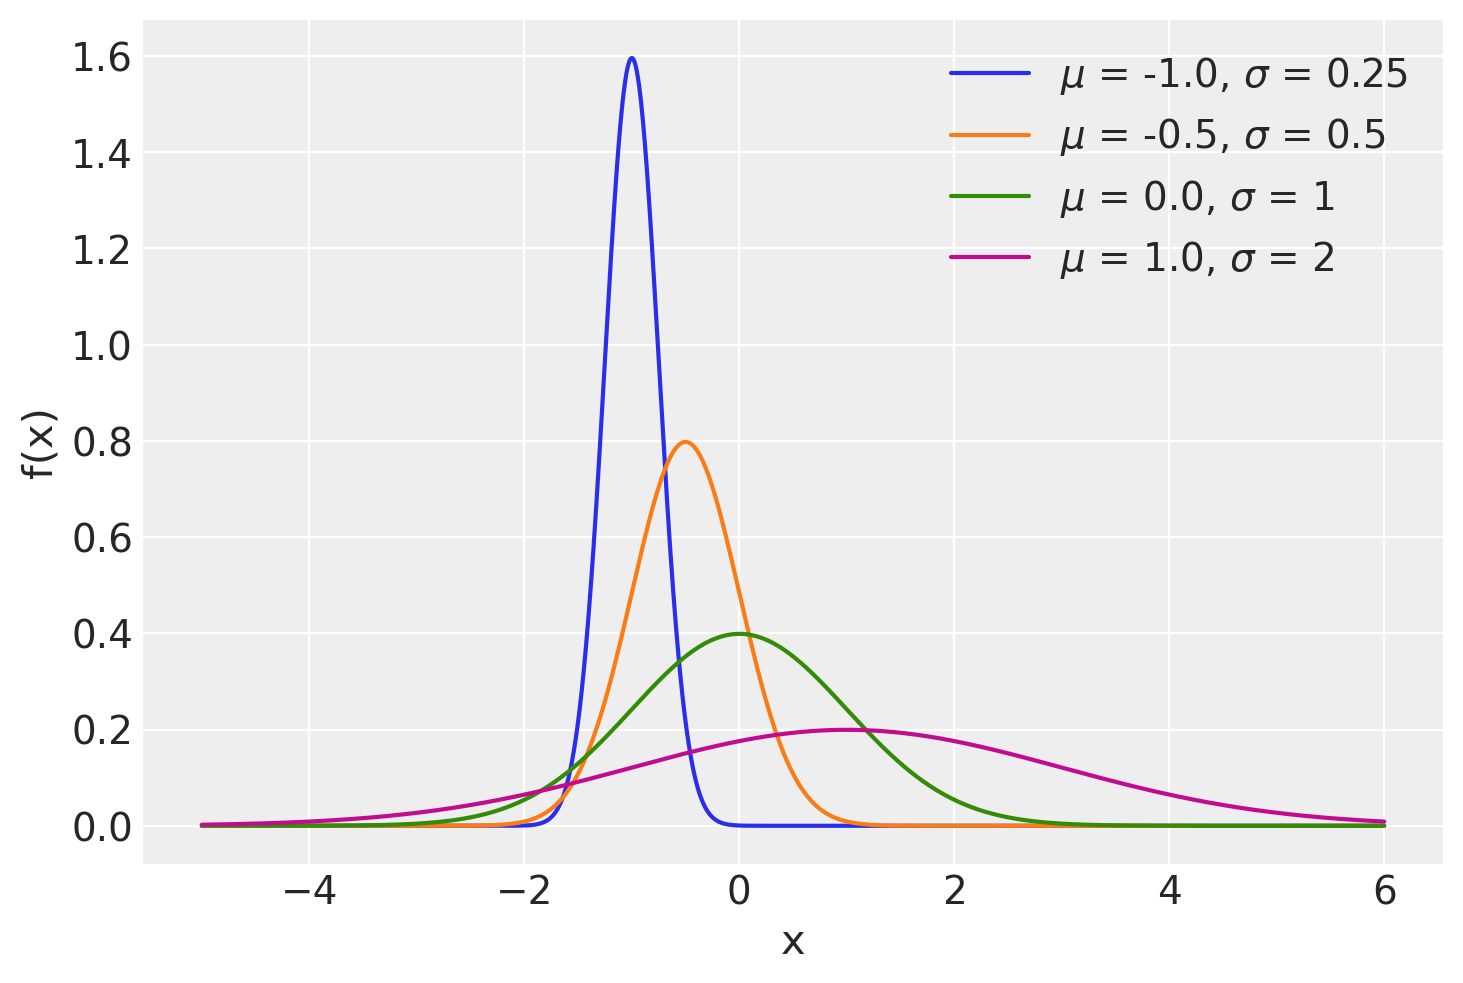

In [32]:
x = np.arange(-5, 6, 0.001)

mus = [-1.0, -0.5, 0.0, 1.0]
sigmas = [0.25, 0.5, 1, 2]

plt.figure()

for mu, sigma in zip(mus, sigmas):
    pdf = stats.norm.pdf(x, mu, sigma)
    plt.plot(x, pdf, label=r"$\mu$ = {}, $\sigma$ = {}".format(mu, sigma))
plt.xlabel("x")
plt.ylabel("f(x)")
plt.legend(loc=1);

In [33]:
stats.norm.rvs(loc=100, scale=15)

89.1711273913221

In [34]:
qi = stats.norm.rvs(loc=100, scale=15, size=10)
print(*qi)

93.6270613170878 77.34293931572745 102.09870261973101 97.57628833663954 106.74479190536265 104.07764058091132 96.20153082073791 109.57972828876832 92.7766402294104 148.97463377497468


In [35]:
stats.norm.cdf(115, 100, 15)

0.8413447460685429

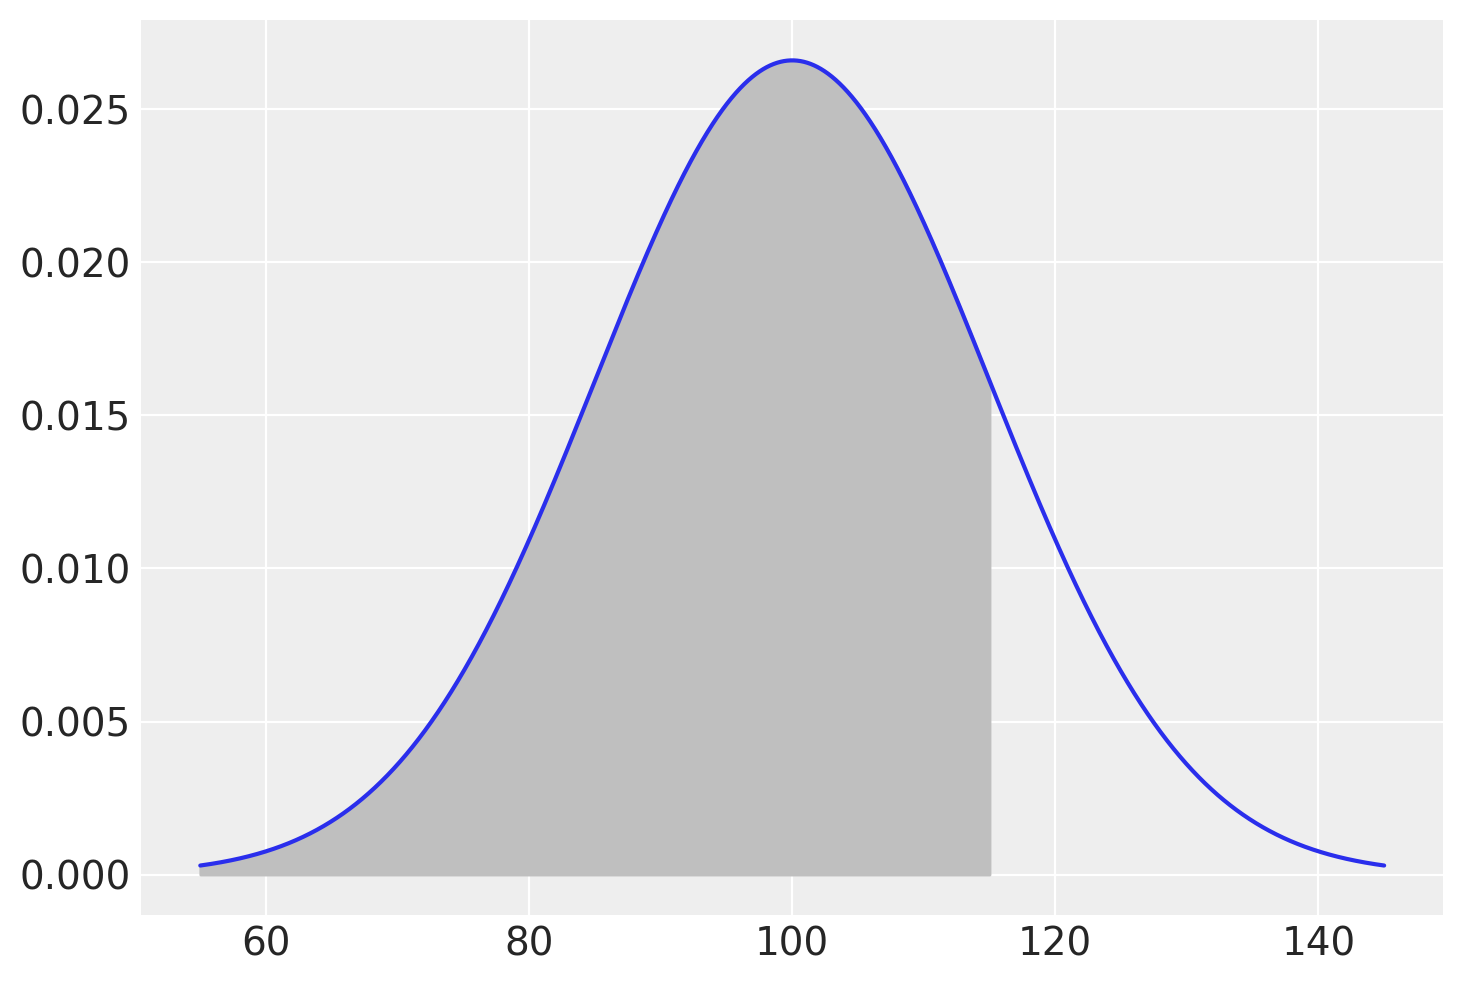

In [36]:
mu = 100
sigma = 15
x = np.linspace(mu - 3 * sigma, mu + 3 * sigma, 10000)
fx = stats.norm.pdf(x, mu, sigma)

plt.figure()
plt.plot(x, fx)
_ = plt.fill_between(x, fx, where=x <= 115, color="0.75")


In [37]:
def gaussian(x, mu, sig):
    return (
        1.0 / (np.sqrt(2.0 * np.pi) * sig) * np.exp(-np.power((x - mu) / sig, 2.0) / 2)
    )

mu = 100
sigma = 15
result, error = quad(gaussian, -1000, 115, args=(mu, sigma))
print("Il risultato è", result, "con errore", error)

Il risultato è 0.841344746068543 con errore 4.0191205799653545e-10


In [38]:
1 - stats.norm.cdf(130, 100, 15)

0.02275013194817921

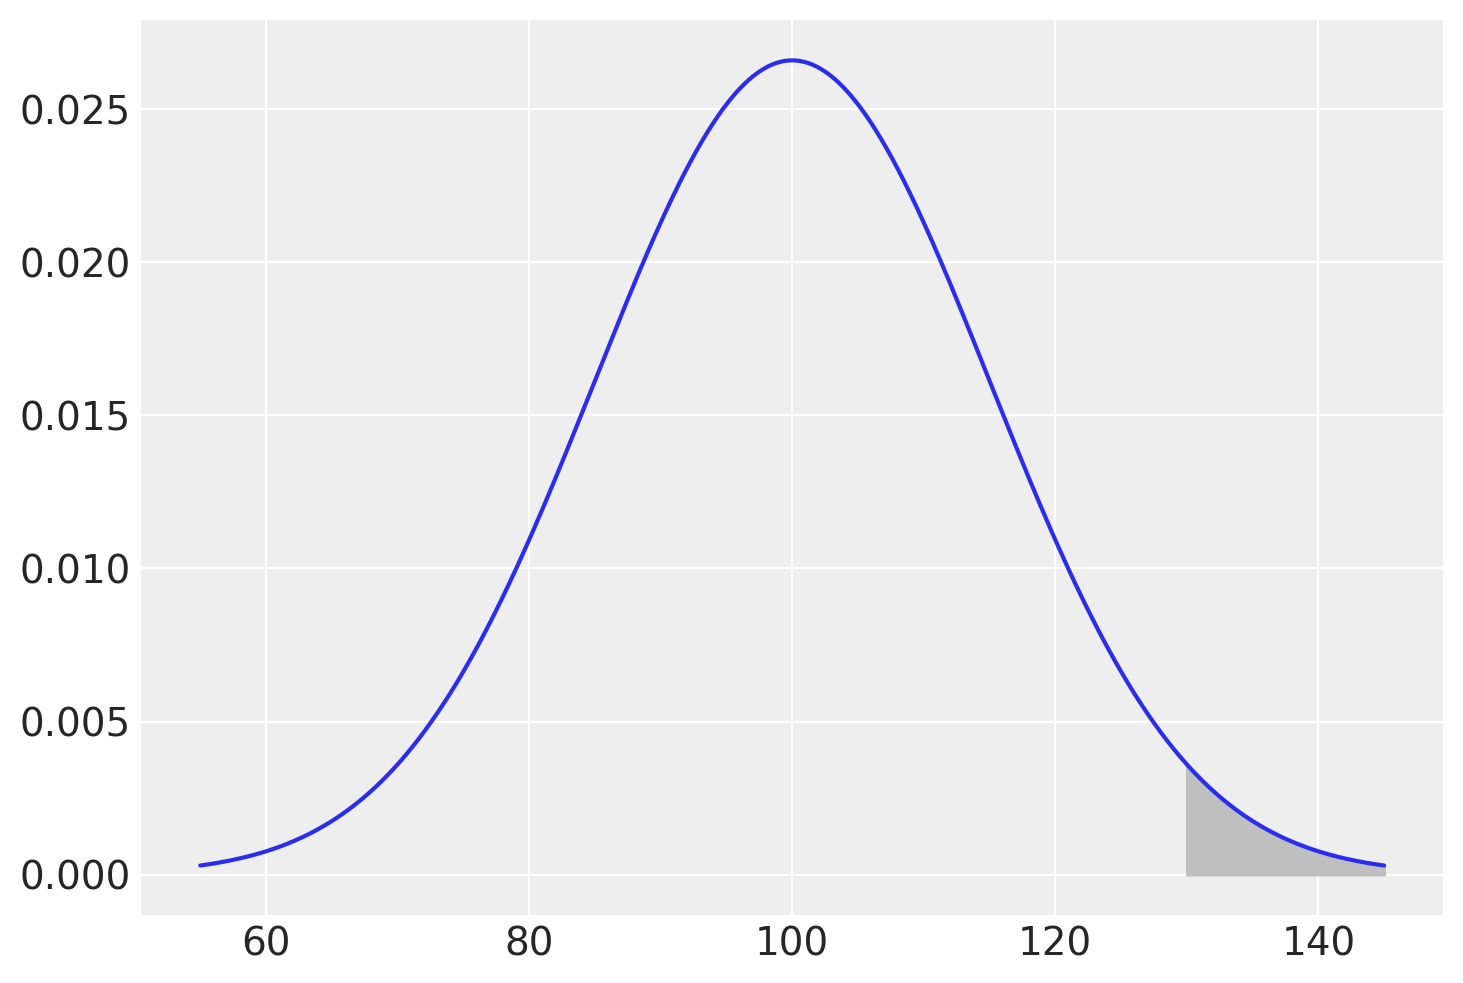

In [39]:
plt.figure()
plt.plot(x, fx)
plt.fill_between(x, fx, where=x >= 130, color="0.75");

In [40]:
stats.norm.sf(130, 100, 15)

0.022750131948179195

In [41]:
stats.norm.ppf(1 - 0.022750131948179195, 100, 15)

130.0

In [42]:
stats.norm.cdf(1.8, 1.7, 0.1) - stats.norm.cdf(1.7, 1.7, 0.1)

0.34134474606854315

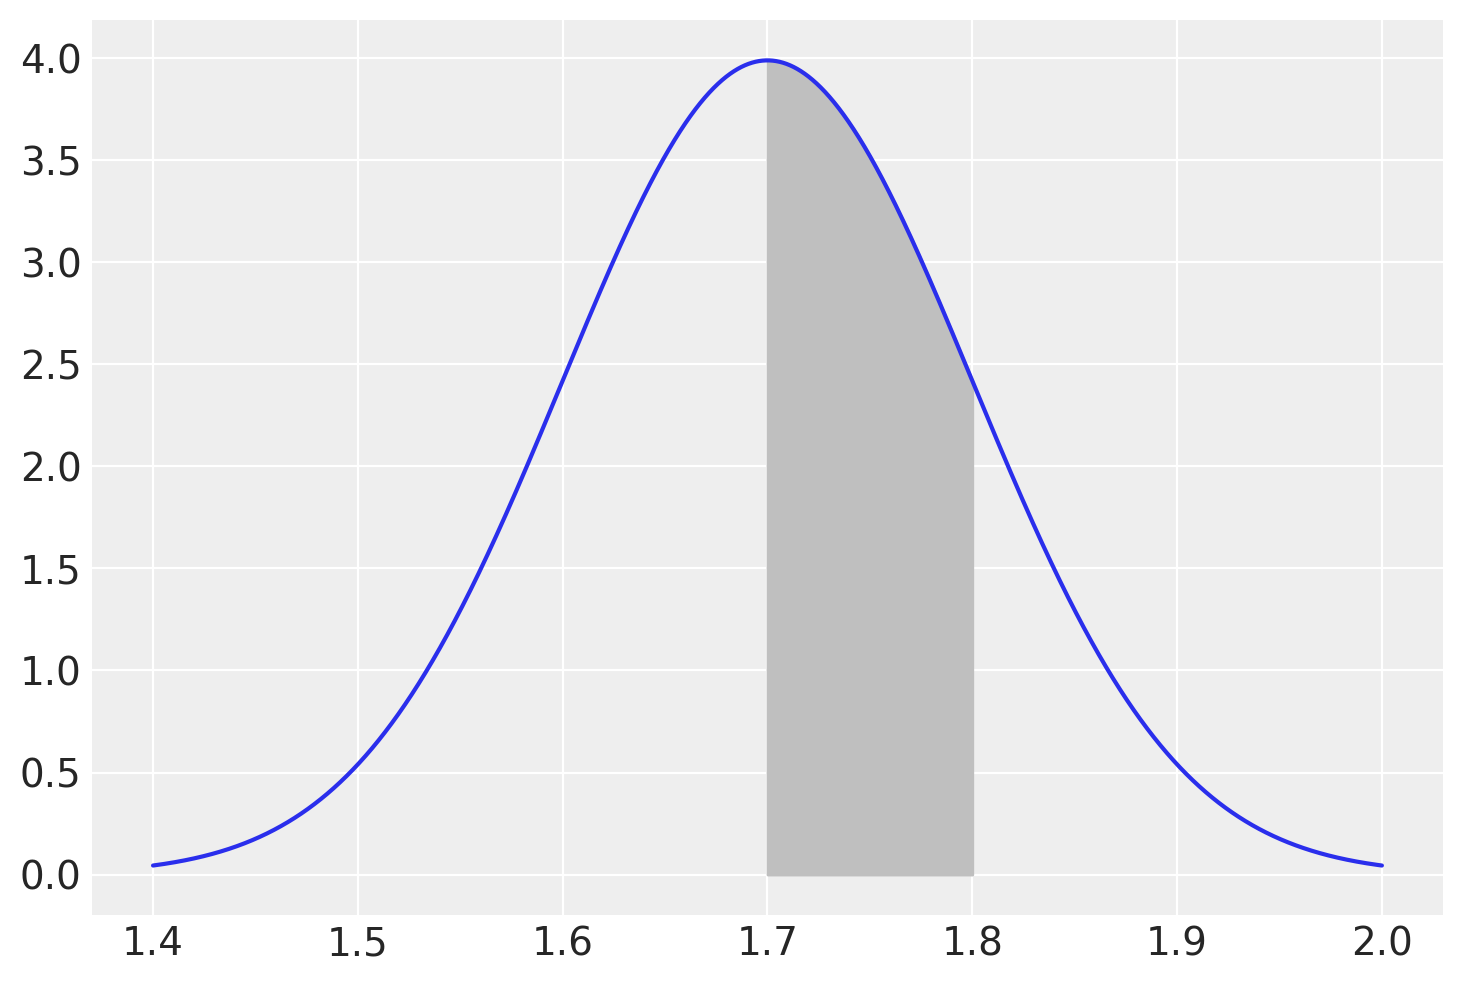

In [43]:
mu = 1.7
sigma = 0.1
x = np.linspace(mu - 3 * sigma, mu + 3 * sigma, 10000)
fx = stats.norm.pdf(x, mu, sigma)
plt.figure()
plt.plot(x, fx)
plt.fill_between(x, fx, where=(x >= 1.7) & (x <= 1.8), color="0.75");

In [44]:
stats.norm.cdf(1.0, 0, 1) - stats.norm.cdf(0, 0, 1)


0.3413447460685429

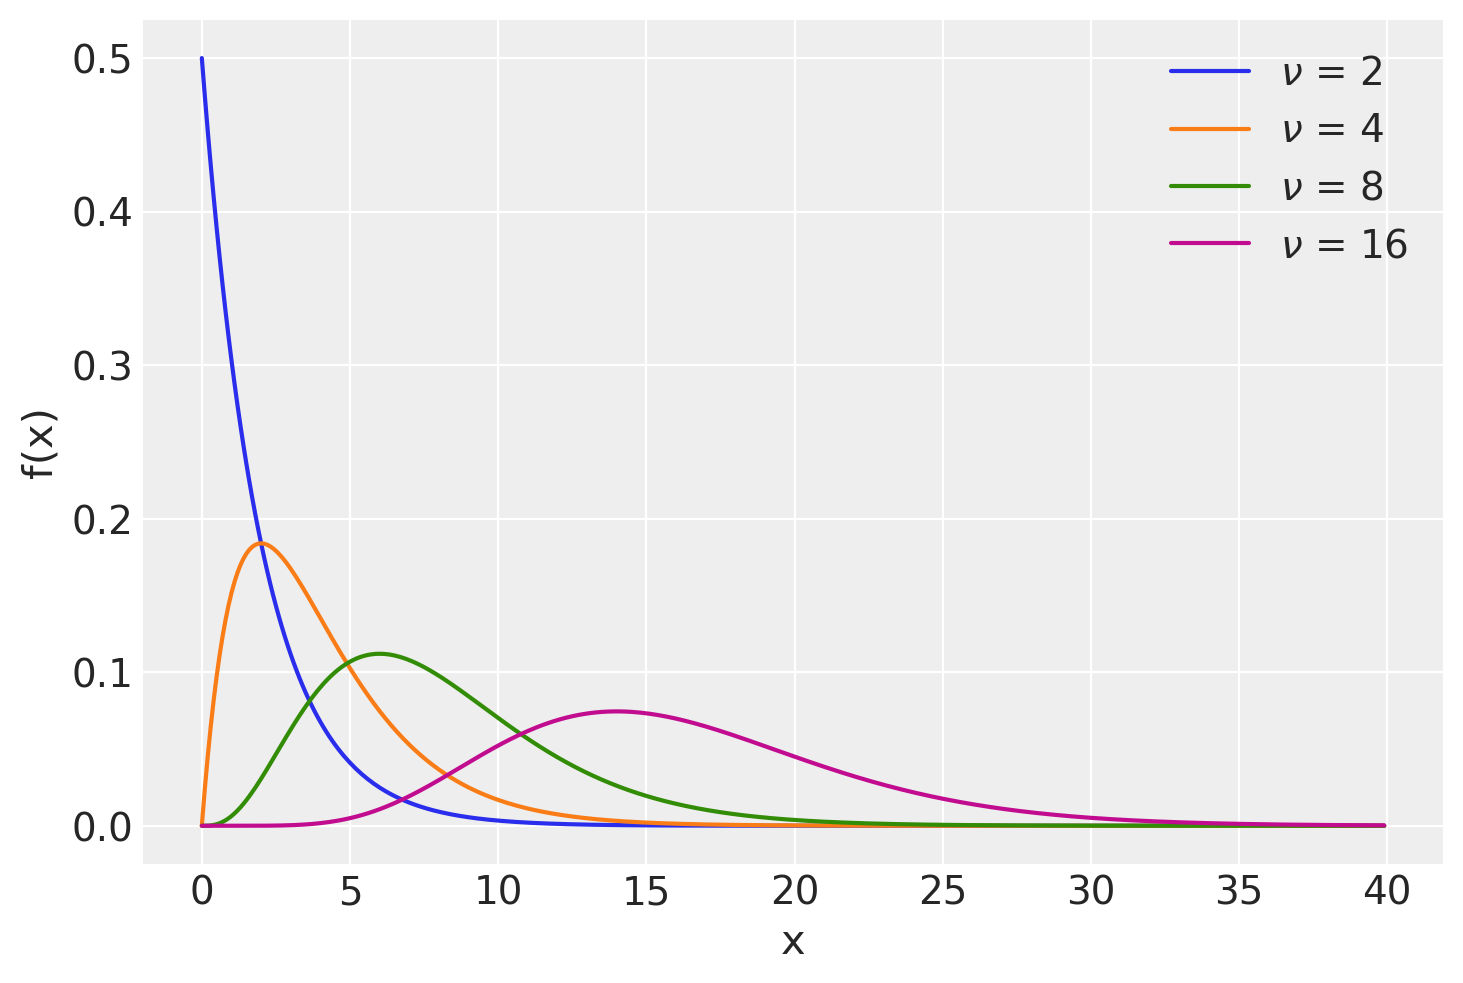

In [45]:
x = np.arange(0, 40, 0.1)

nus = [2, 4, 8, 16]
plt.figure()
for nu in nus:
    pdf = stats.chi2.pdf(x, nu)
    plt.plot(x, pdf, label=r"$\nu$ = {}".format(nu))
plt.xlabel("x")
plt.ylabel("f(x)")
plt.legend(loc=1);

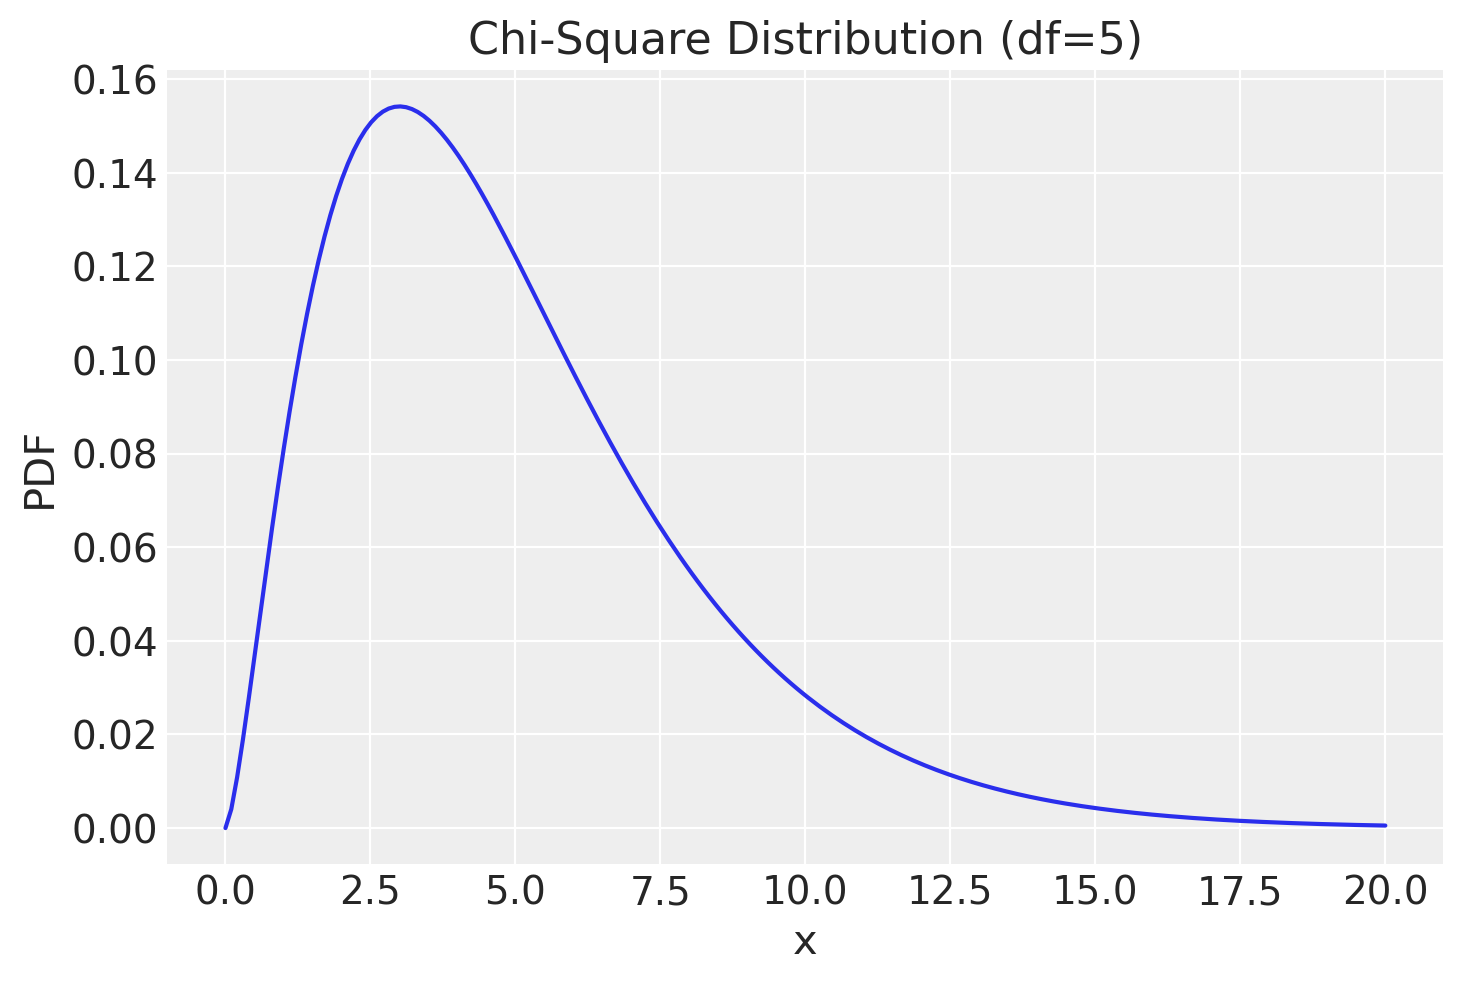

In [46]:
# Set the degrees of freedom
df = 5

# Create a chi-square distribution object
chi2_dist = stats.chi2(df)

# Generate x values for the plot
x = np.linspace(0, 20, 200)

# Calculate the probability density function (PDF) of the chi-square distribution for x values
pdf = chi2_dist.pdf(x)

# Plot the PDF
plt.figure()
plt.plot(x, pdf)
plt.title('Chi-Square Distribution (df=5)')
plt.xlabel('x')
plt.ylabel('PDF');

In [47]:
x = chi2_dist.rvs(1000000)
x[0:20]

array([ 1.77619138,  4.90823738,  7.16851335,  3.17274357, 11.81492081,
        3.66795675,  2.05698475,  4.54177704,  8.70916131,  2.05379701,
        2.8160074 ,  7.19541518, 13.14167897,  2.00910565,  5.16353223,
        0.99454884,  5.5703633 ,  2.48745687, 13.39151185, 12.41804755])

In [48]:
np.mean(x)

4.999968656631126

In [49]:
np.var(x, ddof=0)

9.994068188598714

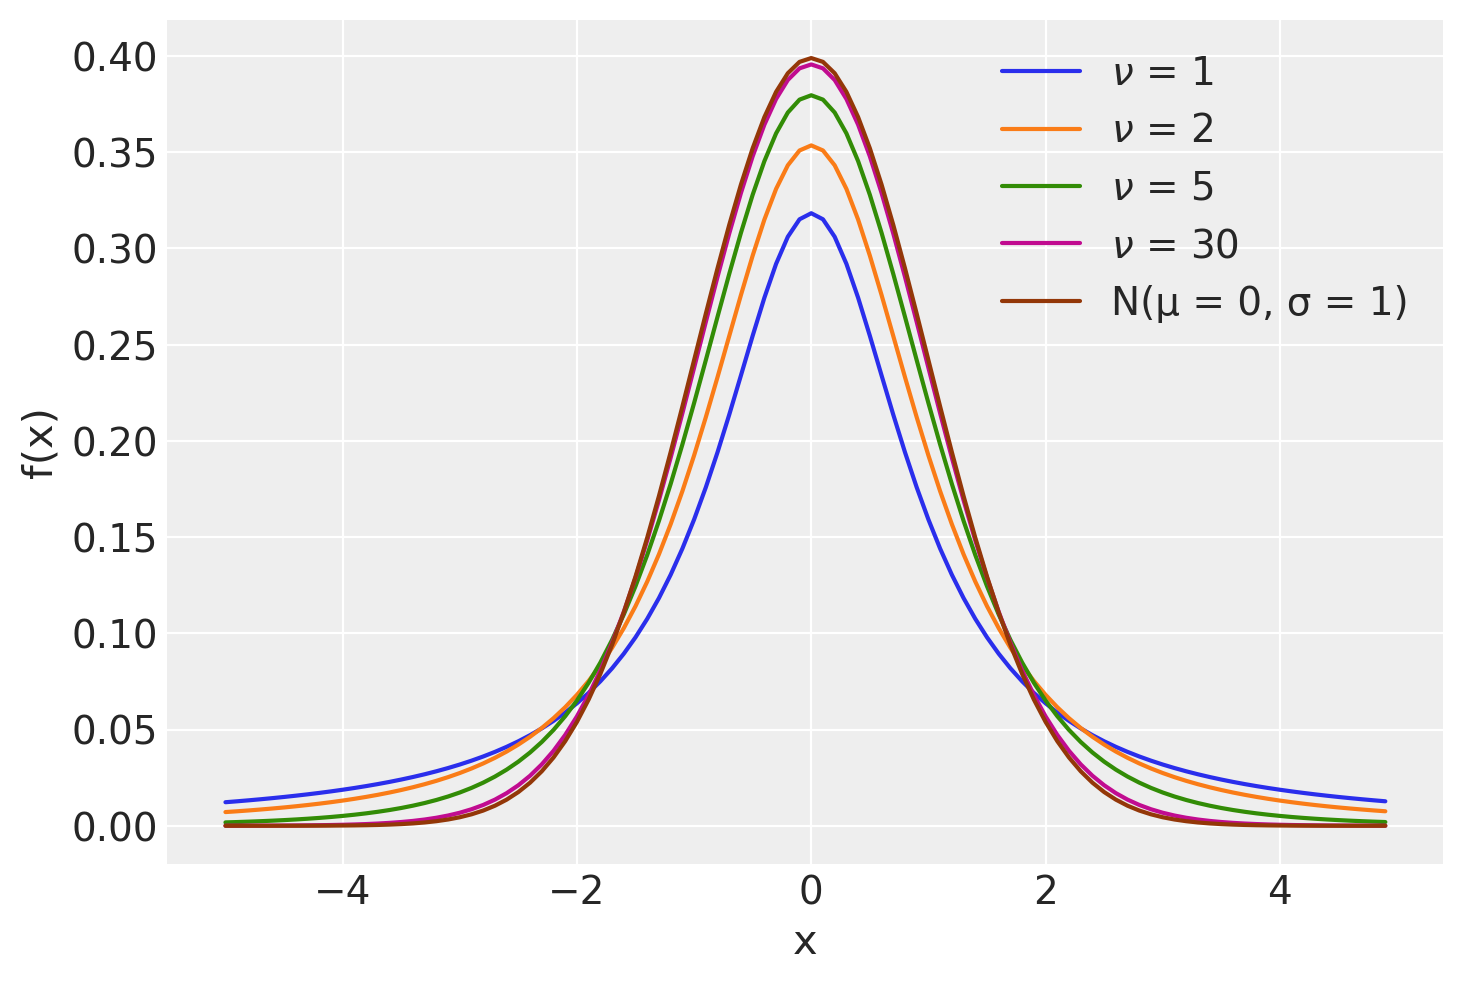

In [50]:
x = np.arange(-5, 5, 0.1)

nus = [1, 2, 5, 30]

plt.figure()
for nu in nus:
    pdf = stats.t.pdf(x, nu)
    plt.plot(x, pdf, label=r"$\nu$ = {}".format(nu))
plt.plot(x, stats.norm.pdf(x, 0, 1), label="N(μ = 0, σ = 1)")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.legend(loc=1);

In [51]:
stats.t.ppf(0.025, 30)

-2.042272456301238

In [52]:
stats.t.ppf(0.025, 1000)

-1.9623390808264078

In [53]:
stats.norm.ppf(0.025, 0, 1)

-1.9599639845400545

In [54]:
alpha = 3
beta = 9
sc.beta(alpha, beta)

0.00202020202020202

In [55]:
((2) * (8 * 7 * 6 * 5 * 4 * 3 * 2)) / (11 * 10 * 9 * 8 * 7 * 6 * 5 * 4 * 3 * 2)


0.00202020202020202

In [56]:
alpha = 3
beta = 9
sc.gamma(alpha) * sc.gamma(beta) / sc.gamma(alpha + beta)


0.00202020202020202

In [57]:
def integrand(p, a, b):
    return p ** (a - 1) * (1 - p) ** (b - 1)


a = 3
b = 9
result, error = quad(integrand, 0, 1, args=(a, b))
print(result)

0.00202020202020202


In [58]:
import math

a = 3
b = 9

result = math.gamma(a) * math.gamma(b) / math.gamma(a + b)
print(result)


0.00202020202020202


In [59]:
sc.beta(a, b)

0.00202020202020202

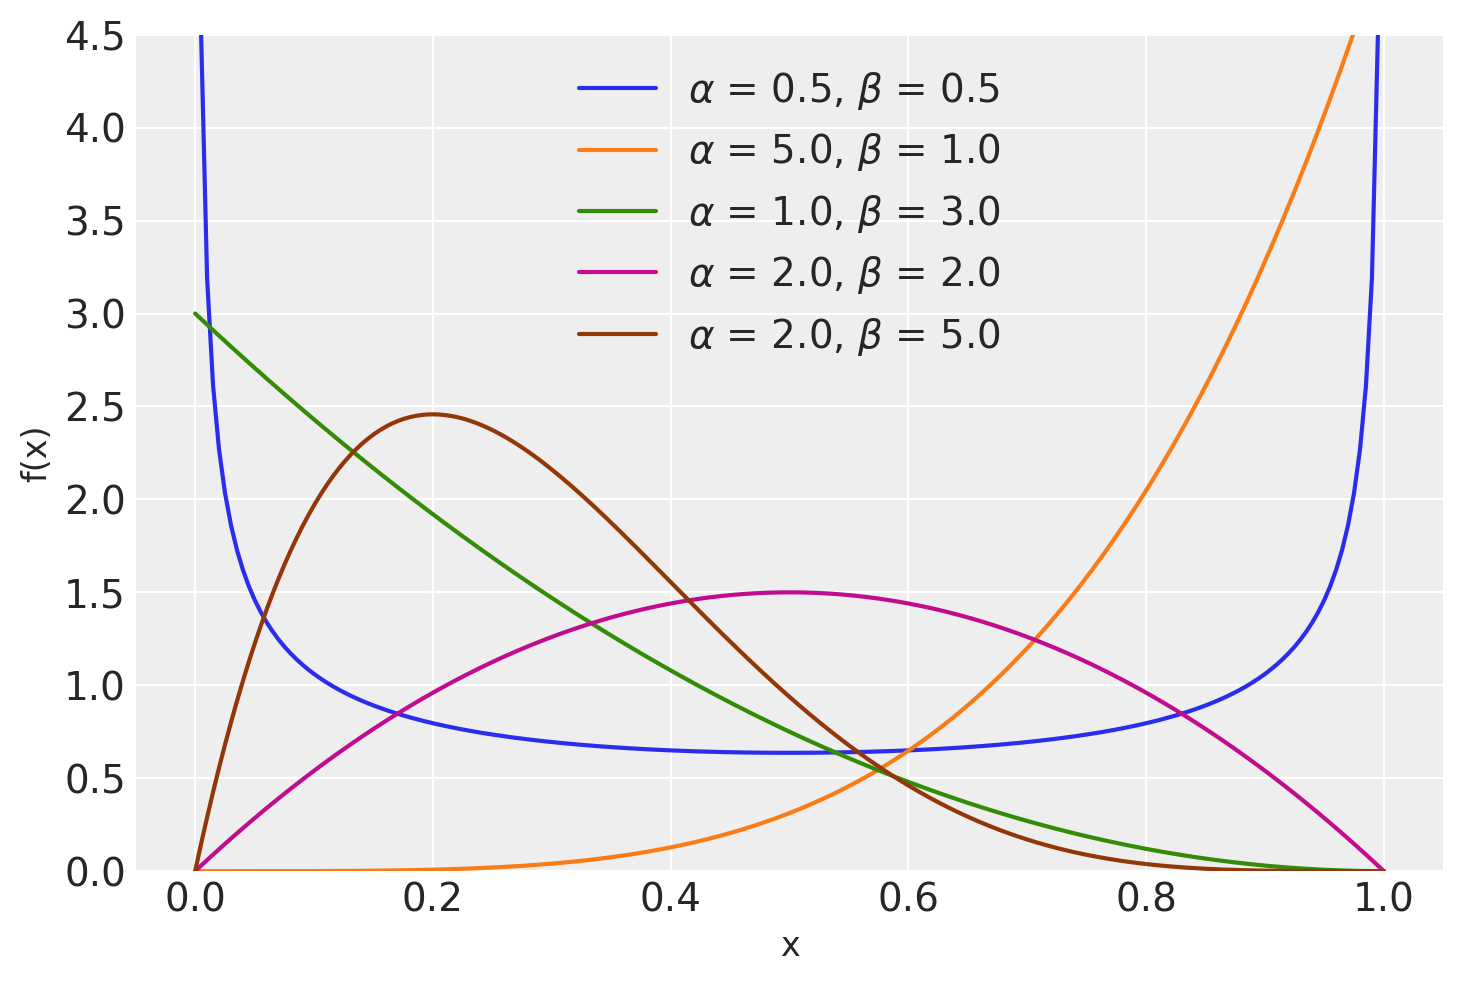

In [60]:
x = np.linspace(0, 1, 200)
alphas = [0.5, 5.0, 1.0, 2.0, 2.0]
betas = [0.5, 1.0, 3.0, 2.0, 5.0]

plt.figure()
for a, b in zip(alphas, betas):
    pdf = stats.beta.pdf(x, a, b)
    plt.plot(x, pdf, label=r"$\alpha$ = {}, $\beta$ = {}".format(a, b))
plt.xlabel("x", fontsize=12)
plt.ylabel("f(x)", fontsize=12)
plt.ylim(0, 4.5)
plt.legend(loc=9);

In [61]:
def beta_mean_mode_variance(alpha, beta):
    mean = alpha / (alpha + beta)
    mode = (alpha - 1) / (alpha + beta - 2)
    variance = alpha * beta / ((alpha + beta) ** 2 * (alpha + beta + 1))
    return mean, mode, variance

In [62]:
alpha = 3
beta = 9
mean, mode, variance = beta_mean_mode_variance(alpha, beta)
print(f"Mean: {mean}, Mode: {mode}, Variance: {variance}")

Mean: 0.25, Mode: 0.2, Variance: 0.014423076923076924


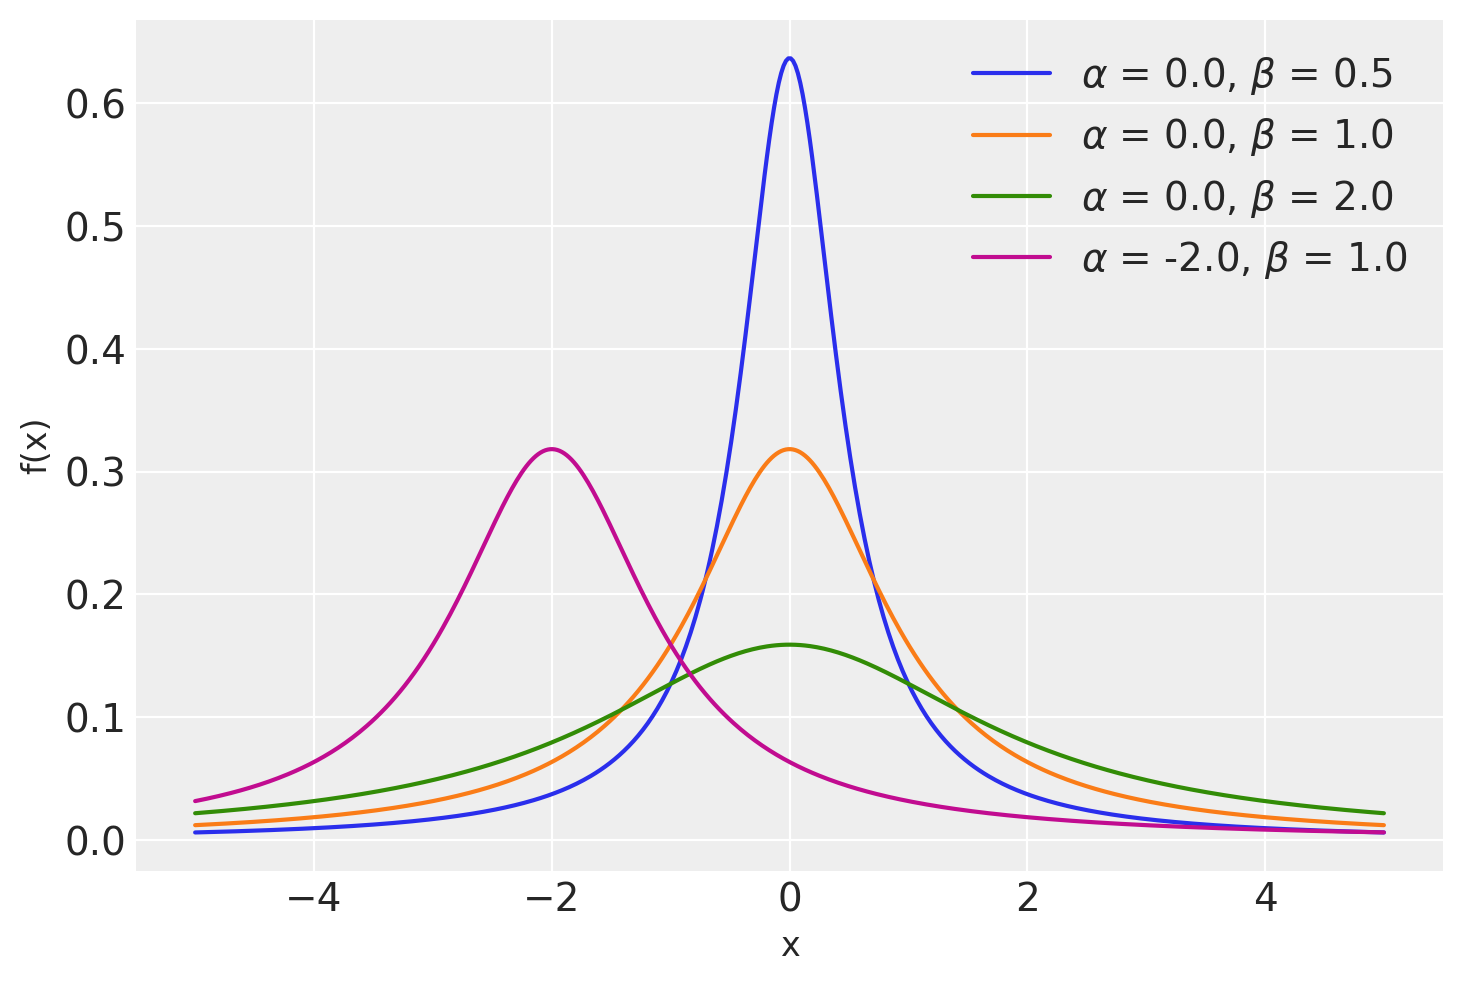

In [63]:
x = np.linspace(-5, 5, 500)
alphas = [0.0, 0.0, 0.0, -2.0]
betas = [0.5, 1.0, 2.0, 1.0]

plt.figure()
for a, b in zip(alphas, betas):
    pdf = stats.cauchy.pdf(x, loc=a, scale=b)
    plt.plot(x, pdf, label=r"$\alpha$ = {}, $\beta$ = {}".format(a, b))
plt.xlabel("x", fontsize=12)
plt.ylabel("f(x)", fontsize=12)
plt.legend(loc=1);

In [64]:
# Media = alpha x beta
alpha = 3
beta = 5/3

mean = alpha * beta
print(mean)

5.0


In [65]:
# Standard deviation = sqrt(alpha * beta^2)

sigma = np.sqrt(alpha * beta**2)
print(sigma)

2.886751345948129


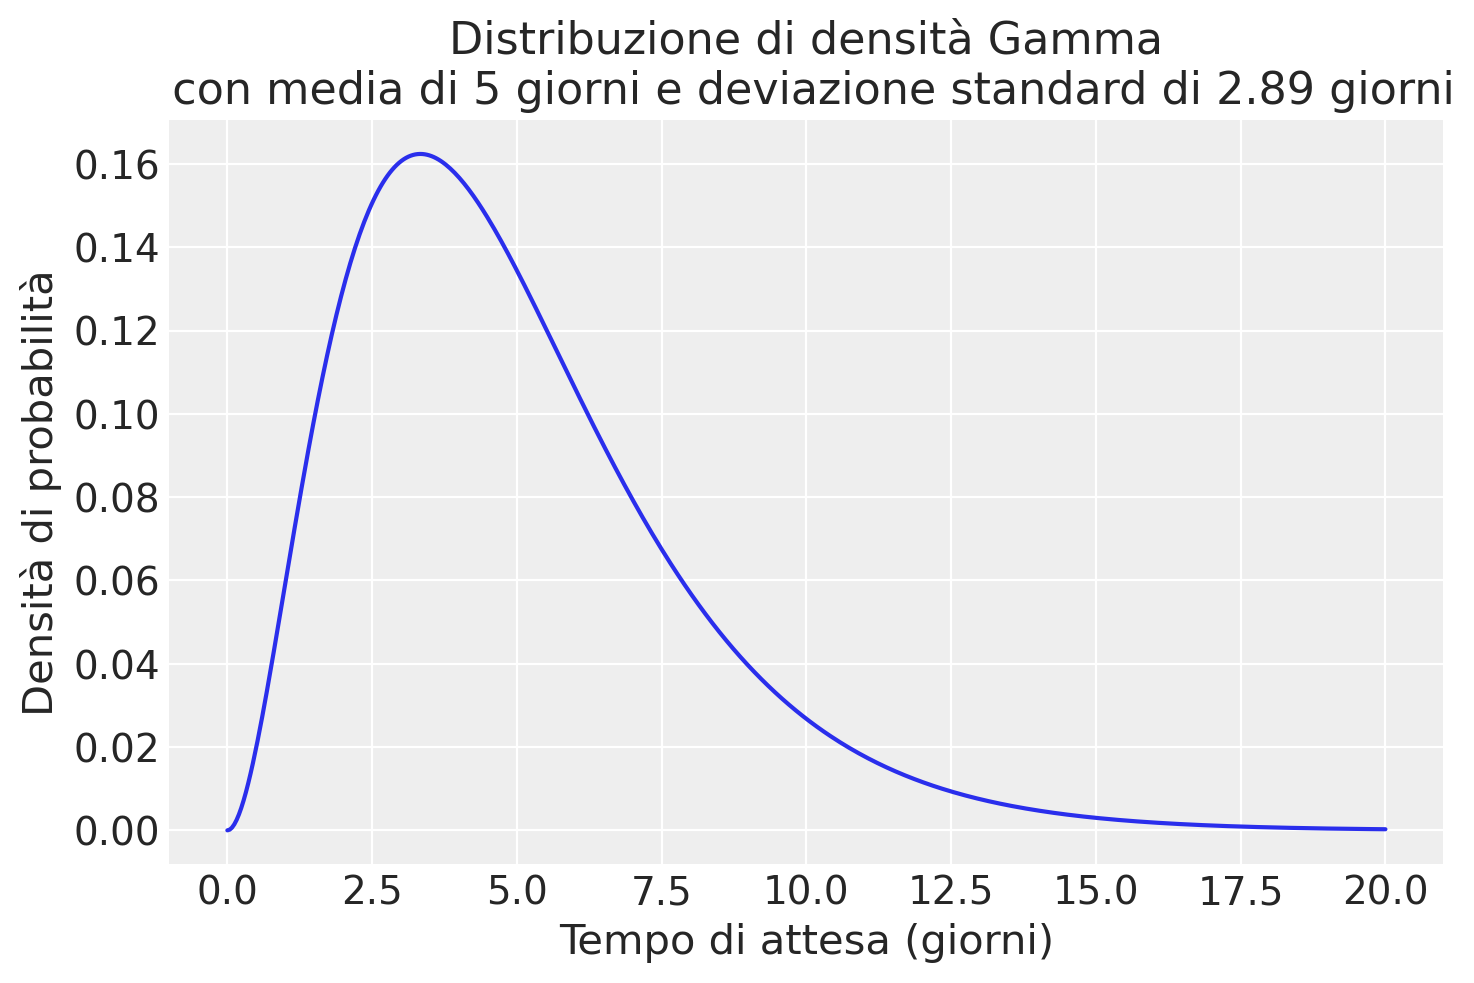

In [66]:
# Parametri della distribuzione gamma
alpha = 3
beta = 5/3

# Creo un array di valori da 0 a 20 (tempo di attesa massimo considerato)
x = np.linspace(0, 20, 500)

# Calcolo la funzione di densità di probabilità (PDF) della distribuzione gamma
pdf_values = stats.gamma.pdf(x, a=alpha, scale=beta)

# Plot del grafico
plt.figure()
plt.plot(x, pdf_values, label='Distribuzione Gamma (shape=3, scale=5/3)')
plt.xlabel('Tempo di attesa (giorni)')
plt.ylabel('Densità di probabilità')
plt.title('Distribuzione di densità Gamma\n con media di 5 giorni e deviazione standard di 2.89 giorni');

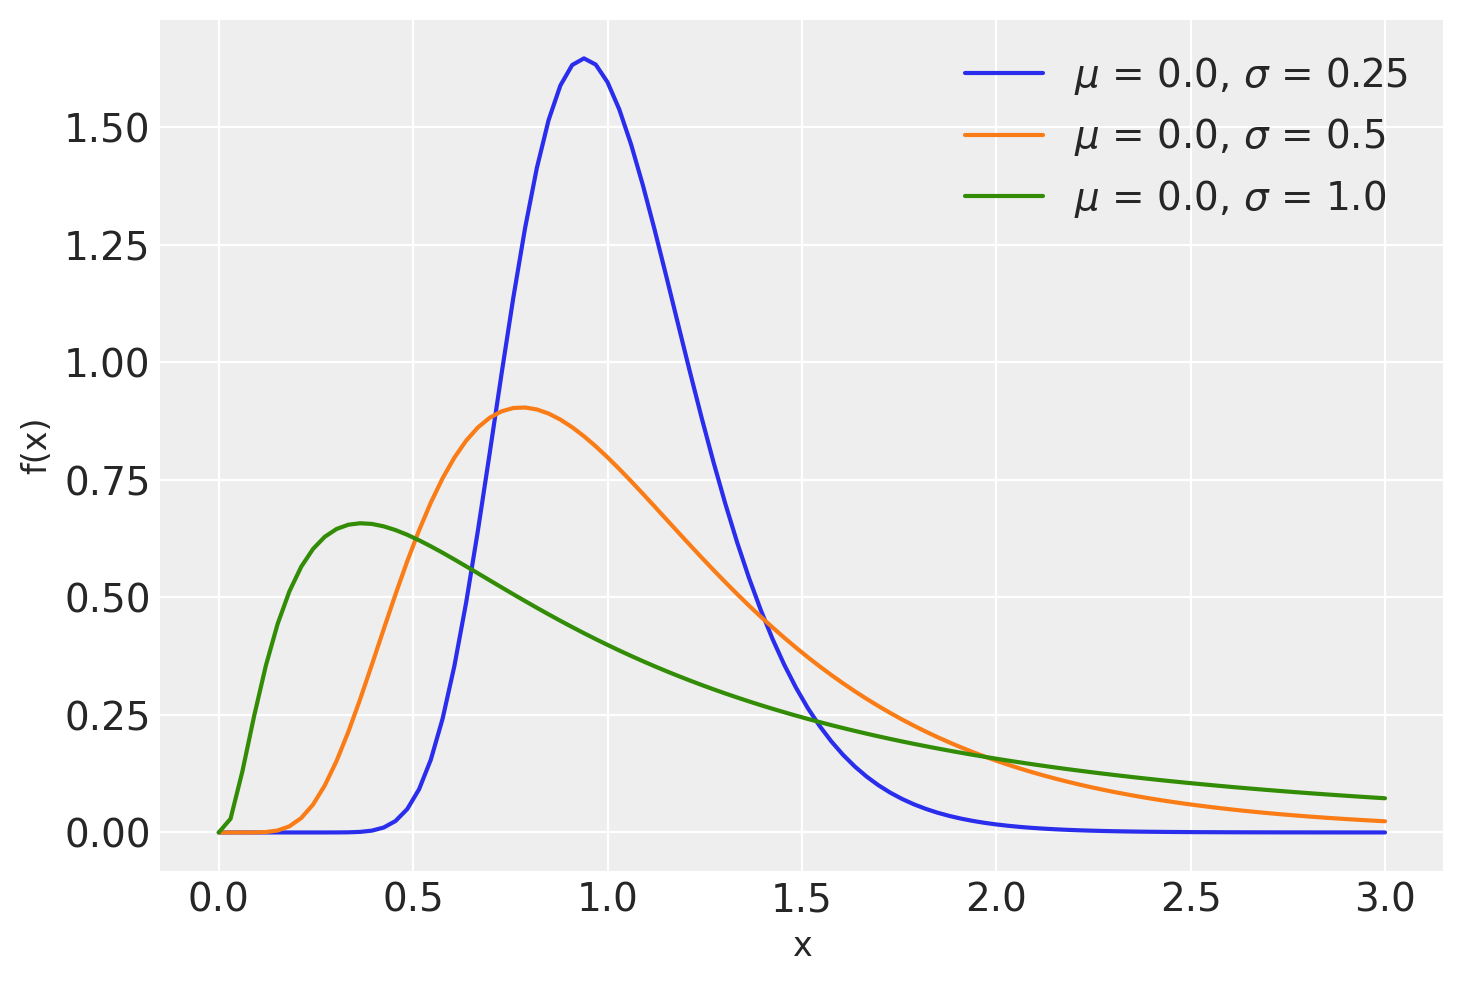

In [67]:
x = np.linspace(0, 3, 100)
mus = [0.0, 0.0, 0.0]
sigmas = [0.25, 0.5, 1.0]
plt.figure()
for mu, sigma in zip(mus, sigmas):
    pdf = stats.lognorm.pdf(x, sigma, scale=np.exp(mu))
    plt.plot(x, pdf, label=r"$\mu$ = {}, $\sigma$ = {}".format(mu, sigma))
plt.xlabel("x", fontsize=12)
plt.ylabel("f(x)", fontsize=12)
plt.legend(loc=1);

In [68]:
%load_ext watermark
%watermark -n -u -v -iv -w

Last updated: Thu Nov 09 2023

Python implementation: CPython
Python version       : 3.11.6
IPython version      : 8.16.1

matplotlib: 3.8.0
numpy     : 1.25.2
scipy     : 1.11.3
arviz     : 0.16.1
seaborn   : 0.13.0
pandas    : 2.1.1

Watermark: 2.4.3

